In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# from datetime import date
sns.set() ## this is for styling
from sklearn.decomposition import PCA
from fuzzywuzzy import process
import calendar

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
call = pd.read_csv("C:/Users/Laura/Desktop/TFG/scripts/calls.csv")
id = pd.read_csv("C:/Users/Laura/Desktop/TFG/scripts/calls_id.csv")
choice = pd.read_csv("C:/Users/Laura/Desktop/TFG/scripts/choice.csv")
inci = pd.read_csv("C:/Users/Laura/Desktop/TFG/scripts/inci.csv")
usu = pd.read_csv("C:/Users/Laura/Desktop/TFG/scripts/usuarios.csv")
equip = pd.read_csv("C:/Users/Laura/Desktop/TFG/scripts/usuarios_equp.csv")

In [3]:
densidad = pd.read_csv("C:/Users/Laura/Desktop/TFG/scripts/jaj.csv")
prov = pd.read_csv("C:/Users/Laura/Desktop/TFG/scripts/prov.csv")

In [4]:
calls = pd.merge(call, id, on='CALL_DEF')
usuarios = pd.merge(usu, equip, on='LOCATION_REF')

### EXPLORACIÓN DE LOS DATOS

In [5]:
usuarios.head()

,LOCATION_REF,USUARIO_REF,TIPOLOGIA_USUARIO,SITUACION,USUARIOS_SITUACION_TEXT,MOTIVO,USUARIOS_MOTIVO_TEXT,POBLACION_REF,POBLACION_TEXT,PROVINCIA_REF,PROVINCIA_TEXT,EQUIP_MODEL_REF,TEXT,DATE_OF_BIRTH,ADDRESS_TOWN,ADDRESS_COUNTY
0,8,8,Personas Mayores de 65 años,0,0-En activo *,0,097-Recibiendo servicio *,2115,002 Ames,15,15 Coruña (La),23,Lifeline 400,1936-08-05 00:00:00,Ames,Coruña (La)
1,14,14,Personas Mayores de 65 años,0,0-En activo *,0,097-Recibiendo servicio *,2115,002 Ames,15,15 Coruña (La),303,Neo-ST,1926-05-19 00:00:00,Ames,Coruña (La)
2,41,41,Discapacitados Físicos,0,0-En activo *,0,097-Recibiendo servicio *,2118,005 Arteixo,15,15 Coruña (La),330,LL Vi,1956-12-06 00:00:00,Arteixo,Coruña (La)
3,45,45,Personas Mayores de 65 años,0,0-En activo *,0,097-Recibiendo servicio *,2118,005 Arteixo,15,15 Coruña (La),120,TAD S/E,1924-11-23 00:00:00,Arteixo,Coruña (La)
4,61,61,Personas Mayores de 65 años,0,0-En activo *,0,097-Recibiendo servicio *,2122,009 Betanzos,15,15 Coruña (La),114,*Neo,1936-03-29 00:00:00,Betanzos,Coruña (La)


In [6]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72192 entries, 0 to 72191
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LOCATION_REF             72192 non-null  int64 
 1   USUARIO_REF              72192 non-null  int64 
 2   TIPOLOGIA_USUARIO        72192 non-null  object
 3   SITUACION                72192 non-null  int64 
 4   USUARIOS_SITUACION_TEXT  72192 non-null  object
 5   MOTIVO                   72192 non-null  int64 
 6   USUARIOS_MOTIVO_TEXT     72192 non-null  object
 7   POBLACION_REF            72192 non-null  int64 
 8   POBLACION_TEXT           72192 non-null  object
 9   PROVINCIA_REF            72192 non-null  int64 
 10  PROVINCIA_TEXT           72192 non-null  object
 11  EQUIP_MODEL_REF          72192 non-null  int64 
 12  TEXT                     72192 non-null  object
 13  DATE_OF_BIRTH            72065 non-null  object
 14  ADDRESS_TOWN             72190 non-nul

In [7]:
#checking data types
calls.head()

,CALL_DEF,MEANING,ARRIVAL_TIME,REASON_REF,TEXT,CALL_ENTITY_TYPE,ENTITY_NAME,RESIDENT_DEF
0,7976782,Primera UCR - Tercer residente,2020-06-06 16:28:34,1078,63-Segui usuari@ desde centro*,2,Vivienda/EPEC,13729
1,7976784,Primera UCR - Primer Residente,2020-06-06 16:29:12,1078,63-Segui usuari@ desde centro*,2,Vivienda/EPEC,29916
2,7976785,Baja Bateria Terminal,2020-06-06 16:29:21,27,Llamada segundo plano,2,Vivienda/EPEC,16142
3,7976786,Telefono,2020-06-06 16:29:24,1074,50-Continuación evento previo,2,Vivienda/EPEC,30228
4,7976787,Primera UCR - Primer Residente,2020-06-06 16:29:49,1078,63-Segui usuari@ desde centro*,2,Vivienda/EPEC,29411


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5264745 entries, 0 to 5264744
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   CALL_DEF          int64 
 1   MEANING           object
 2   ARRIVAL_TIME      object
 3   REASON_REF        int64 
 4   TEXT              object
 5   CALL_ENTITY_TYPE  int64 
 6   ENTITY_NAME       object
 7   RESIDENT_DEF      int64 
dtypes: int64(4), object(4)
memory usage: 361.5+ MB


In [9]:
inci.head()

,INCI_HISTORY_DEF,INCI_DATE,RESIDENT_DEF,INCIDENT_DEF,TEXT,DATE_OF_BIRTH,INCI_TYPE_REF,TEXT.1,ADDRESS_TOWN,ADDRESS_COUNTY
0,1821,2009-08-26 00:00:00,1,16,No contacta,1920-05-18 00:00:00,2,AveríaTAD- urgente,Abegondo,Coruña (La)
1,1963,2009-09-12 00:00:00,2,74,Otros,1921-06-22 00:00:00,13,Otros,Abegondo,Coruña (La)
2,2115,2009-09-28 00:00:00,2,13,Batería baja term.,1921-06-22 00:00:00,1,AveríaTAD-NO urgente,Abegondo,Coruña (La)
3,2345,2009-10-26 00:00:00,2,9,Otros,1921-06-22 00:00:00,1,AveríaTAD-NO urgente,Abegondo,Coruña (La)
4,1420,2009-07-05 00:00:00,3,74,Otros,1929-02-01 00:00:00,13,Otros,Abegondo,Coruña (La)


In [10]:
inci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179715 entries, 0 to 179714
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   INCI_HISTORY_DEF  179715 non-null  int64 
 1   INCI_DATE         179715 non-null  object
 2   RESIDENT_DEF      179715 non-null  int64 
 3   INCIDENT_DEF      179715 non-null  int64 
 4   TEXT              179715 non-null  object
 5   DATE_OF_BIRTH     179677 non-null  object
 6   INCI_TYPE_REF     179715 non-null  int64 
 7   TEXT.1            179715 non-null  object
 8   ADDRESS_TOWN      179714 non-null  object
 9   ADDRESS_COUNTY    179713 non-null  object
dtypes: int64(4), object(6)
memory usage: 13.7+ MB


- Cálculo de la edad de los usuarios:

In [11]:
fecha_actual = pd.to_datetime('2023-08-24')
usuarios['DATE_OF_BIRTH'] = pd.to_datetime(usuarios['DATE_OF_BIRTH'])
inci['DATE_OF_BIRTH'] = pd.to_datetime(inci['DATE_OF_BIRTH'])
date_birth = pd.to_datetime(usuarios['DATE_OF_BIRTH'])
date_birt = pd.to_datetime(inci['DATE_OF_BIRTH'])

diferencia = (fecha_actual - date_birth).dt.days
dif = (fecha_actual - date_birt).dt.days
usuarios['Edad'] = (diferencia // 365)
inci['Edad'] = (dif // 365)

In [12]:
calls = calls.rename(columns={"RESIDENT_DEF": "LOCATION_REF"})

In [13]:
# df_usuarios_sin_duplicados = usuarios.drop_duplicates(subset='LOCATION_REF', keep='last')
df_usuarios_sin_duplicados = usuarios.groupby('LOCATION_REF').apply(lambda x: x.sample(n=1)).reset_index(drop=True)
llam = pd.merge(calls, df_usuarios_sin_duplicados[['LOCATION_REF', 'Edad', 'PROVINCIA_TEXT', 'POBLACION_TEXT']], on='LOCATION_REF', how='left')

In [14]:
coincidencias = calls['LOCATION_REF'].isin(df_usuarios_sin_duplicados['LOCATION_REF']).sum()
print(f"Hay {coincidencias} coincidencias de LOCATION_REF entre 'llamadas' y 'df_usuarios_sin_duplicados'.")


Hay 5224662 coincidencias de LOCATION_REF entre 'llamadas' y 'df_usuarios_sin_duplicados'.


In [15]:
print(llam.isnull().sum())


CALL_DEF                0
MEANING                 2
ARRIVAL_TIME            0
REASON_REF              0
TEXT                    9
CALL_ENTITY_TYPE        0
ENTITY_NAME             0
LOCATION_REF            0
Edad                43327
PROVINCIA_TEXT      40083
POBLACION_TEXT      40083
dtype: int64


In [16]:
# Convertir la columna 'fecha' a tipo datetime si aún no lo está
inci['INCI_DATE'] = pd.to_datetime(inci['INCI_DATE'])

# Crear una máscara booleana para seleccionar filas con fechas en el rango de años deseado
mask = (inci['INCI_DATE'].dt.year >= 2018) & (inci['INCI_DATE'].dt.year <= 2022)

# Aplicar la máscara para seleccionar las filas
inci = inci[mask]

In [17]:
inci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88037 entries, 2051 to 179713
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   INCI_HISTORY_DEF  88037 non-null  int64         
 1   INCI_DATE         88037 non-null  datetime64[ns]
 2   RESIDENT_DEF      88037 non-null  int64         
 3   INCIDENT_DEF      88037 non-null  int64         
 4   TEXT              88037 non-null  object        
 5   DATE_OF_BIRTH     88014 non-null  datetime64[ns]
 6   INCI_TYPE_REF     88037 non-null  int64         
 7   TEXT.1            88037 non-null  object        
 8   ADDRESS_TOWN      88036 non-null  object        
 9   ADDRESS_COUNTY    88036 non-null  object        
 10  Edad              88014 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 8.1+ MB


Visualización

- Usuarios

In [18]:
df = pd.DataFrame(df_usuarios_sin_duplicados)

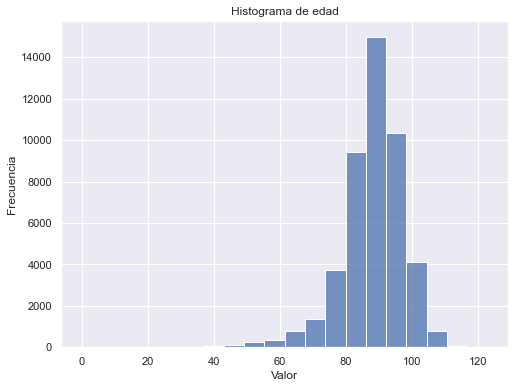

In [19]:
# Histograma de una columna numérica
plt.figure(figsize=(8, 6))
sns.histplot(df['Edad'], bins=20)
plt.title('Histograma de edad')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
media = np.mean(df['Edad'])
mediana = np.median(df['Edad'][~np.isnan(df['Edad'])])
desviacion_estandar = np.std(df['Edad'])

print("Media:", media)
print("Mediana:", mediana)
print("Desviación Estándar:", desviacion_estandar)

Media: 88.24127531236536
Mediana: 89.0
Desviación Estándar: 9.621263652550951


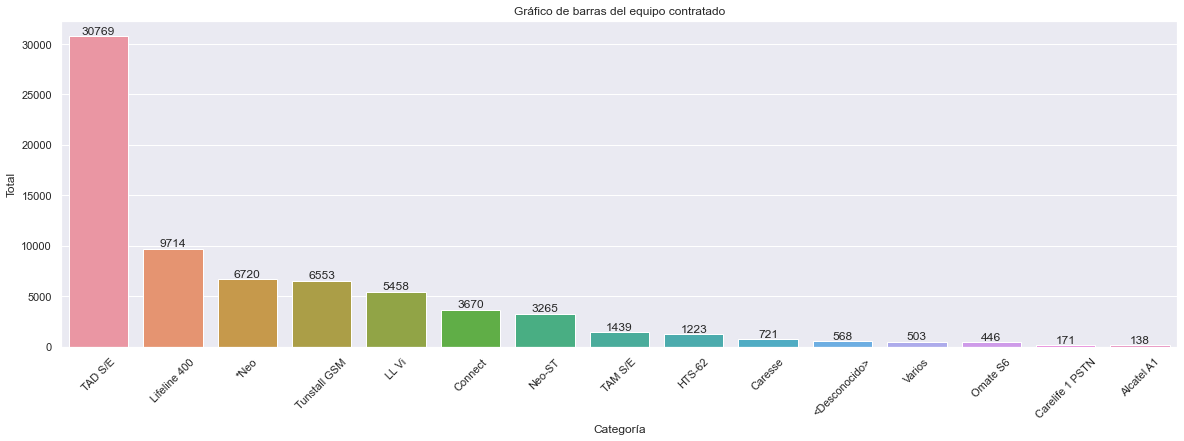

In [21]:
# Gráfico de barras de una columna categórica
frecuencias = usuarios['TEXT'].value_counts()


top_n = 15
frecuencias_top = frecuencias.head(top_n) 
# Crear el gráfico de barras con ejes intercambiados
plt.figure(figsize=(20,6))  # Aquí también ajusta el tamaño del gráfico según tus necesidades
sns.countplot(x='TEXT', data=usuarios, order=frecuencias_top.index)
plt.title('Gráfico de barras del equipo contratado')
plt.xlabel('Categoría')
plt.ylabel('Total')
plt.xticks(rotation=45) 
for index, value in enumerate(frecuencias_top):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

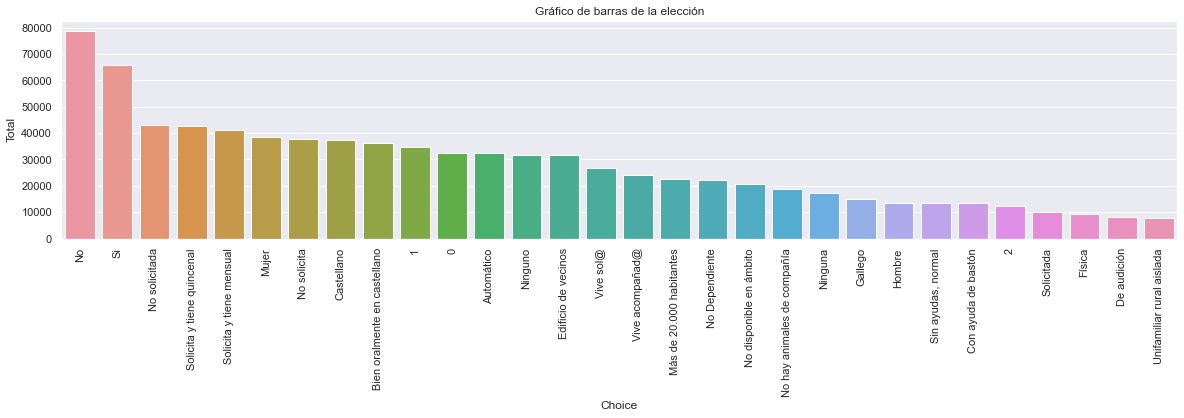

In [22]:
# Gráfico de barras de una columna categórica
plt.figure(figsize=(20, 4))
frecuencias = choice['TEXT'].value_counts()
top_n = 30
frecuencias_top = frecuencias.head(top_n) 
sns.countplot(x='TEXT', data=choice, order=frecuencias_top.index)
plt.title('Gráfico de barras de la elección')
plt.xlabel('Choice')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.show()

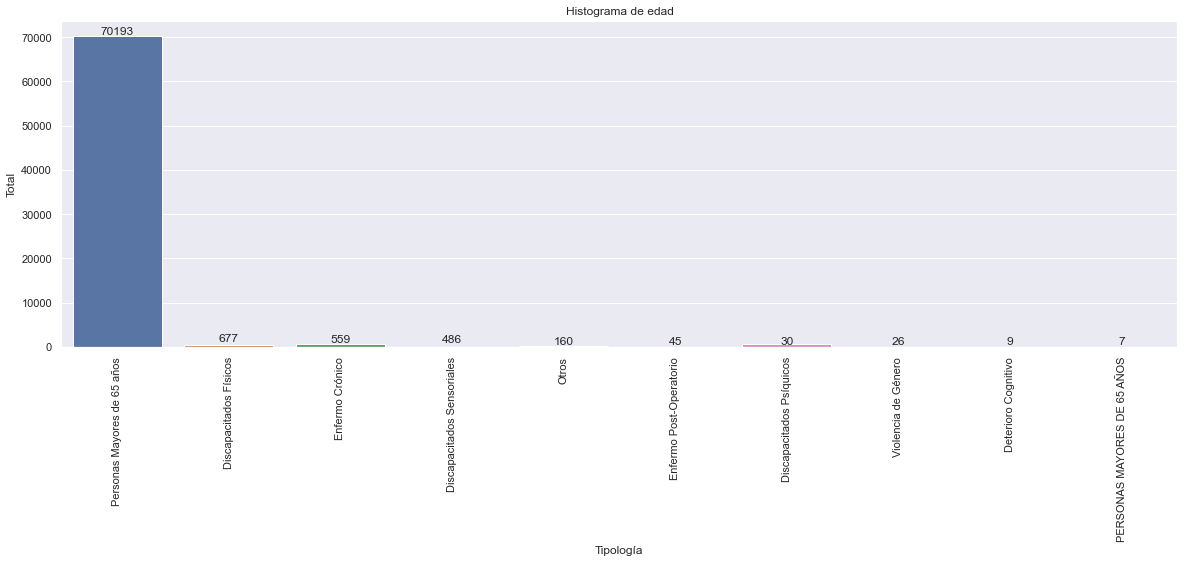

In [23]:
# Histograma de una columna numérica
plt.figure(figsize=(20, 6))
frecuencias = usuarios['TIPOLOGIA_USUARIO'].value_counts()
sns.countplot(x='TIPOLOGIA_USUARIO', data=usuarios)
plt.title('Histograma de edad')
plt.xlabel('Tipología')
plt.ylabel('Total')
for index, value in enumerate(frecuencias):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

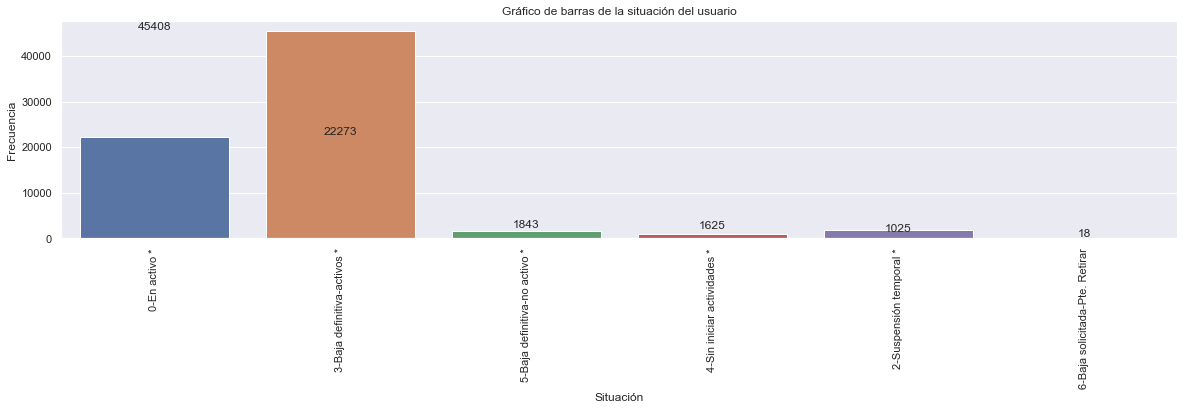

In [24]:
# Gráfico de barras de una columna categórica
plt.figure(figsize=(20, 4))
frecuencias = usuarios['USUARIOS_SITUACION_TEXT'].value_counts()
sns.countplot(x='USUARIOS_SITUACION_TEXT', data=usuarios)
plt.title('Gráfico de barras de la situación del usuario')
plt.xlabel('Situación')
plt.ylabel('Frecuencia')
for index, value in enumerate(frecuencias):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

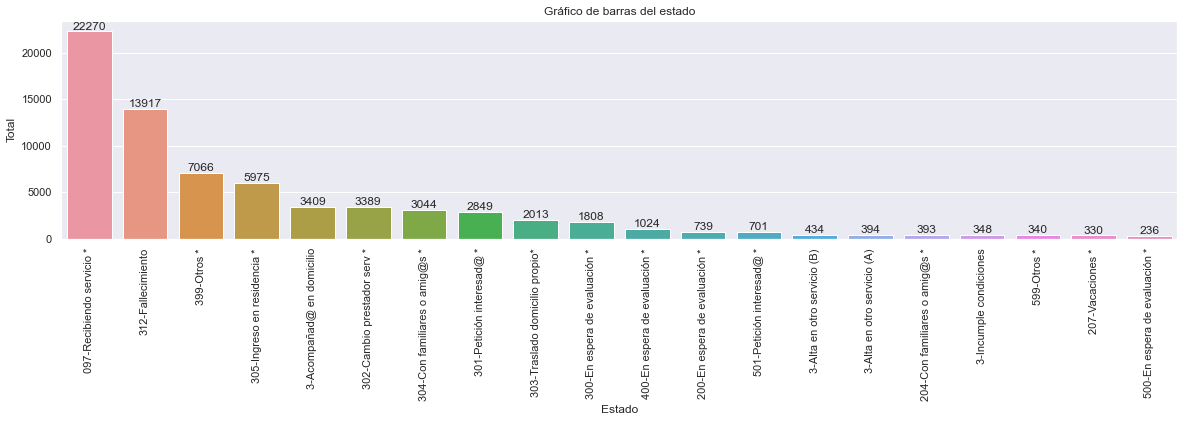

In [25]:
# Gráfico de barras de una columna categórica
plt.figure(figsize=(20, 4))
frecuencias = usuarios['USUARIOS_MOTIVO_TEXT'].value_counts()
top_n = 20
frecuencias_top = frecuencias.head(top_n)

sns.countplot(x='USUARIOS_MOTIVO_TEXT', data=usuarios, order=frecuencias_top.index)
plt.title('Gráfico de barras del estado')
plt.xlabel('Estado')
plt.ylabel('Total')
for index, value in enumerate(frecuencias_top):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

In [26]:
def normalize_text(value, choices):
    best_match, score = process.extractOne(value, choices)
    if score >= 50:  # Establece un umbral de similitud
        return best_match
    else:
        return value

# Obtiene los valores únicos de la columna 'Espazo' en el DataFrame 'frec_finales'
espazo_choices = inci['ADDRESS_TOWN'].unique()

# Aplica la normalización a la columna 'Espazo' en el DataFrame 'densidad'
densidad['ADDRESS_TOWN'] = densidad['Espazo'].apply(normalize_text, args=(espazo_choices,))
densidad['DENSITY'] = densidad['DatoN']
columns_to_drop = ['CodTempo', 'Tempo', 'Variables', 'CodEspazo', 'Espazo', 'DatoN', 'DatoT']
densidad = densidad.drop(columns=columns_to_drop)
# Ordenar el DataFrame por Densidad_Poblacion en orden ascendente
df_ordenado = densidad.sort_values(by='DENSITY', ascending=False)
df_ordenado.head(15)

,ADDRESS_TOWN,DENSITY
35,Coruña (A),6371.3
317,Vigo,2623.0
117,Burela,1239.2
199,Ourense,1204.7
37,Oleiros,853.1
302,Vilagarcía de Arousa,847.2
47,Ferrol,769.0
297,Illa de Arousa,710.7
279,Cangas,696.6
293,Vedra,685.2


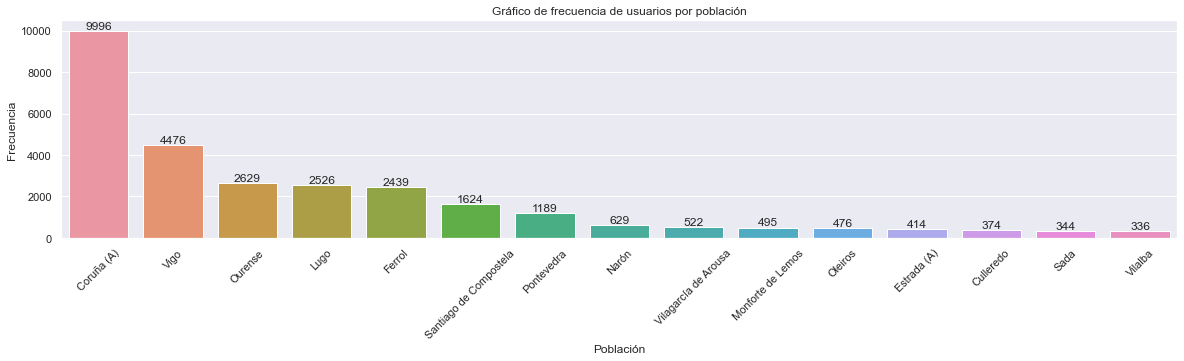

In [27]:
# Gráfico de barras de una columna categórica
# Calcular la frecuencia de cada categoría
frecuencias = df['ADDRESS_TOWN'].value_counts()

top_n = 15
frecuencias_top = frecuencias.head(top_n)

# Crear el gráfico de barras con ejes intercambiados
plt.figure(figsize=(20,4))  # Aquí también ajusta el tamaño del gráfico según tus necesidades
sns.countplot(x='ADDRESS_TOWN', data=df, order=frecuencias_top.index)
plt.title('Gráfico de frecuencia de usuarios por población')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
for index, value in enumerate(frecuencias_top):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [28]:
def normalize_text(value, choices):
    best_match, score = process.extractOne(value, choices)
    if score >= 50:  # Establece un umbral de similitud
        return best_match
    else:
        return value

# Obtiene los valores únicos de la columna 'Espazo' en el DataFrame 'frec_finales'
espazo_choices = inci['ADDRESS_COUNTY'].unique()

# Aplica la normalización a la columna 'Espazo' en el DataFrame 'densidad'
prov['ADDRESS_COUNTY'] = prov['Espazo'].apply(normalize_text, args=(espazo_choices,))
prov['DENSITY_PROV'] = prov['DatoN']
columns_to_drop = ['CodTempo', 'Tempo', 'Variables', 'CodEspazo', 'Espazo', 'DatoN', 'DatoT']
prov = prov.drop(columns=columns_to_drop)
prov.drop(0)

,ADDRESS_COUNTY,DENSITY_PROV
1,Coruña (La),140.9
2,Lugo,32.9
3,Orense,41.8
4,Pontevedra,209.8


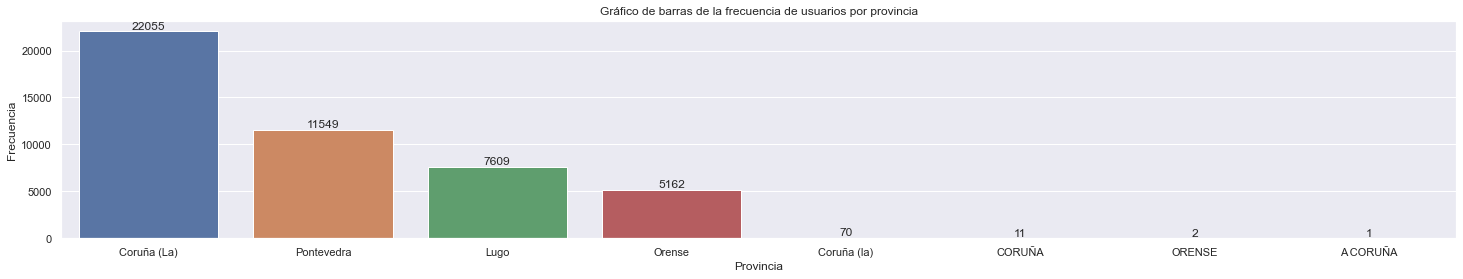

In [29]:
# Gráfico de barras de una columna categórica
plt.figure(figsize=(25, 4))
frecuencias = df['ADDRESS_COUNTY'].value_counts()
sns.countplot(x='ADDRESS_COUNTY', data=df, order=frecuencias.index)
plt.title('Gráfico de barras de la frecuencia de usuarios por provincia')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
for index, value in enumerate(frecuencias):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

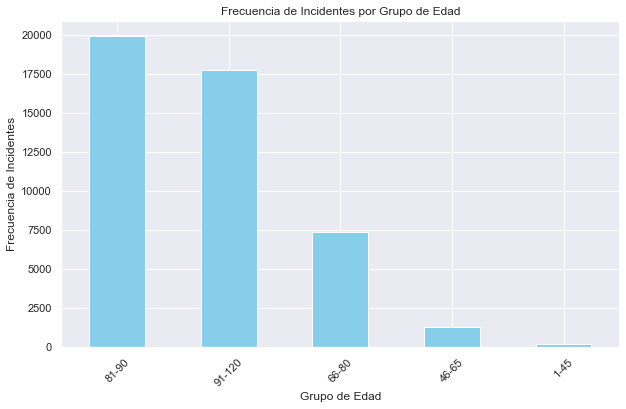

In [30]:
# Definir los rangos de edades
rangos_edades = [(1, 45), (46, 65), (66, 80), (81, 90), (91, 120)]
etiquetas_rangos = ['1-45', '46-65', '66-80', '81-90', '91-120']

# Crear una columna para el grupo de edad
df['Grupo Edad'] = pd.cut(df['Edad'], bins=[r[0] for r in rangos_edades] + [rangos_edades[-1][1]], labels=etiquetas_rangos)

# Calcular la frecuencia de incidentes por grupo de edad
frecuencia_por_grupo = df['Grupo Edad'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_por_grupo.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia de Incidentes')
plt.title('Frecuencia de Incidentes por Grupo de Edad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- 81-90 años: esta franja de edad muestra una frecuencia alta de usuarios.

- 91-120: esta franja de edad muestra una frecuencia ligeramente menor de usuarios en comparación con el grupo anterior.

- 66-80: esta franja de edad muestra una frecuencia moderada de usuarios. 

- 46-65: esta franja de edad muestra una frecuencia muy menor de usuarios  en comparación con los grupos más jóvenes. 
- 1-45: el grupo de usuarios de 1-45 años muestra la frecuencia más baja de usuarios. Los usuarios en este rango de edades son menos comunes.

Los usuarios más jóvenes tienden a no contratar teleasistencia en comparación con los grupos de edades más avanzadas. Por otro lado, los usuarios de 81 a 90 años parecen ser más propensos a contratarla.

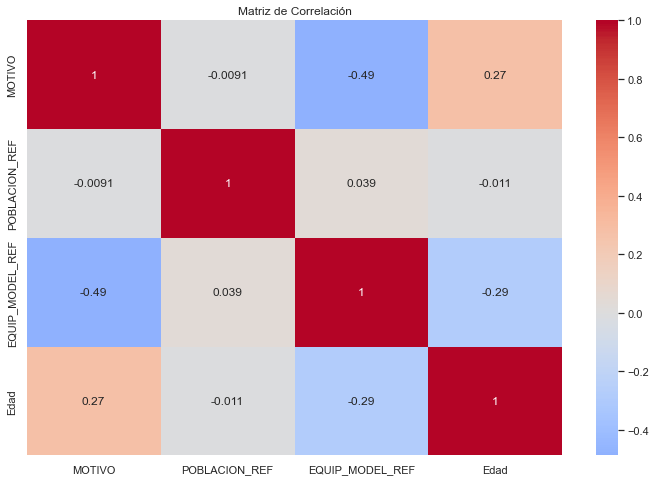

In [31]:
# Filtrar las columnas numéricas (todos los tipos numéricos)
usu_corr = df.select_dtypes(include=['number'])
usu_corr = usu_corr[['MOTIVO', 'POBLACION_REF', 'EQUIP_MODEL_REF', 'Edad']]


matriz_correlacion = usu_corr.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

- Llamadas

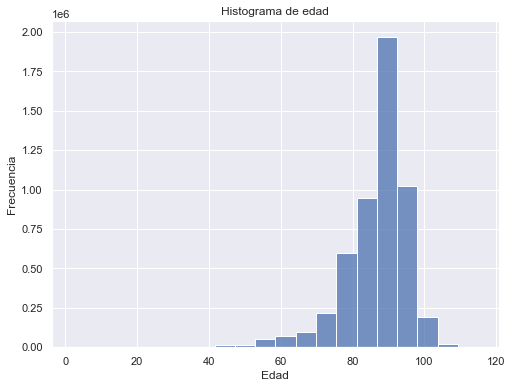

In [32]:
# Histograma de una columna numérica
plt.figure(figsize=(8, 6))
sns.histplot(llam['Edad'], bins=20)
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [33]:
media = np.mean(llam['Edad'])
mediana = np.median(llam['Edad'][~np.isnan(llam['Edad'])])
desviacion_estandar = np.std(llam['Edad'])

print("Media:", media)
print("Mediana:", mediana)
print("Desviación Estándar:", desviacion_estandar)

Media: 86.68552297479344
Mediana: 88.0
Desviación Estándar: 9.149043938033126


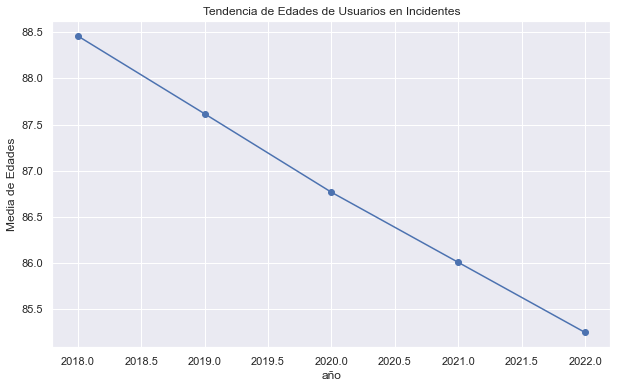

In [34]:
# Agrupar por año y calcular la media de edades
llam['ARRIVAL_TIME'] = pd.to_datetime(llam['ARRIVAL_TIME'])
llam['año'] = llam['ARRIVAL_TIME'].dt.year
edades_por_año = llam.groupby('año')['Edad'].mean()

# Crear gráfico de tendencias
plt.figure(figsize=(10, 6))
plt.plot(edades_por_año.index, edades_por_año.values, marker='o')
plt.xlabel('año')
plt.ylabel('Media de Edades')
plt.title('Tendencia de Edades de Usuarios en Incidentes')
plt.grid(True)
plt.show()

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


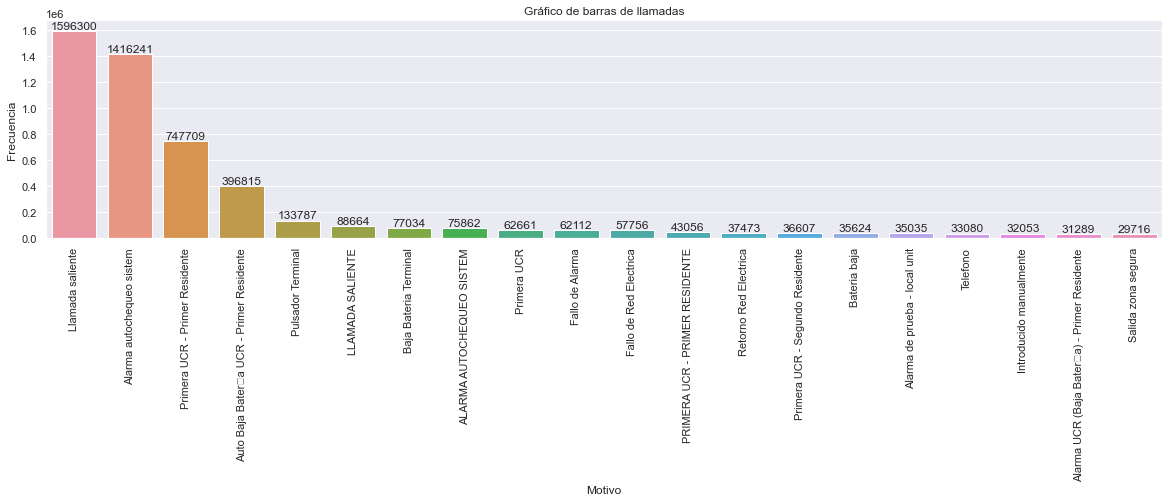

In [35]:
# Gráfico de barras de una columna categórica
frecuencias = llam['MEANING'].value_counts()

top_n = 20
frecuencias_top = frecuencias.head(top_n)

plt.figure(figsize=(20,4))  # Aquí también ajusta el tamaño del gráfico según tus necesidades
sns.countplot(x='MEANING', data=llam, order=frecuencias_top.index)
plt.title('Gráfico de barras de llamadas')
plt.xlabel('Motivo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90) 
for index, value in enumerate(frecuencias_top):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

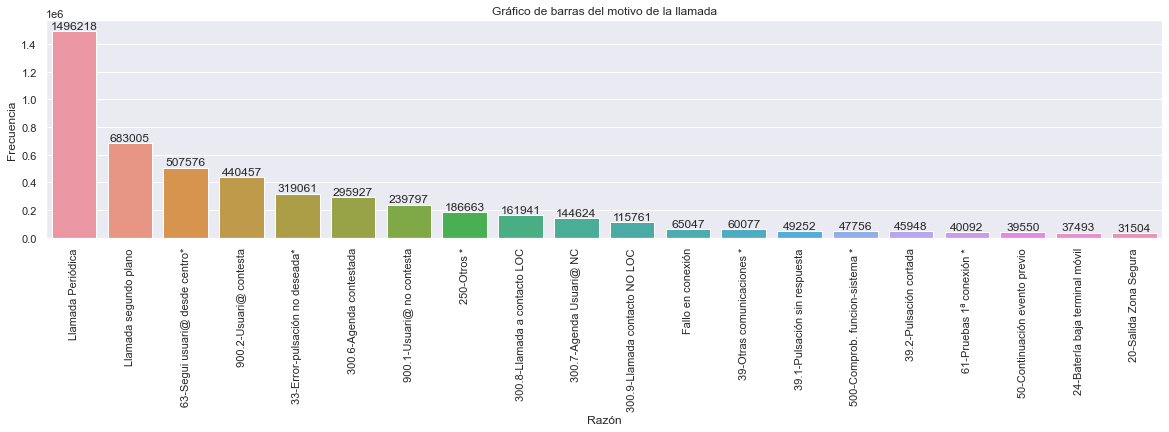

In [36]:
# Gráfico de barras de una columna categórica
plt.figure(figsize=(20, 4))
frecuencias = llam['TEXT'].value_counts()
top_n = 20
frecuencias_top = frecuencias.head(top_n)
sns.countplot(x='TEXT', data=llam, order=frecuencias_top.index)
plt.title('Gráfico de barras del motivo de la llamada')
plt.xlabel('Razón')
plt.ylabel('Frecuencia')
for index, value in enumerate(frecuencias_top):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

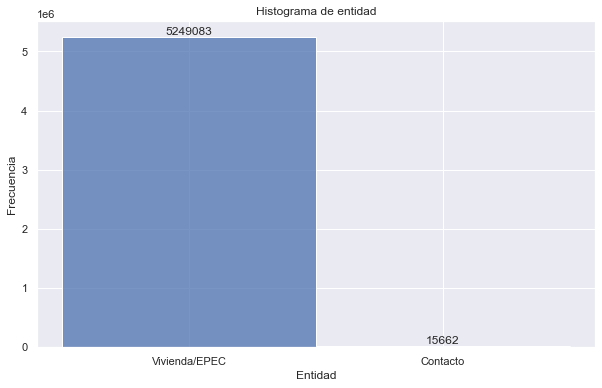

In [37]:
# Histograma de una columna numérica
plt.figure(figsize=(10, 6))
frecuencias = llam['ENTITY_NAME'].value_counts()
sns.histplot(llam['ENTITY_NAME'], bins=20)
plt.title('Histograma de entidad')
plt.xlabel('Entidad')
plt.ylabel('Frecuencia')
for index, value in enumerate(frecuencias):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

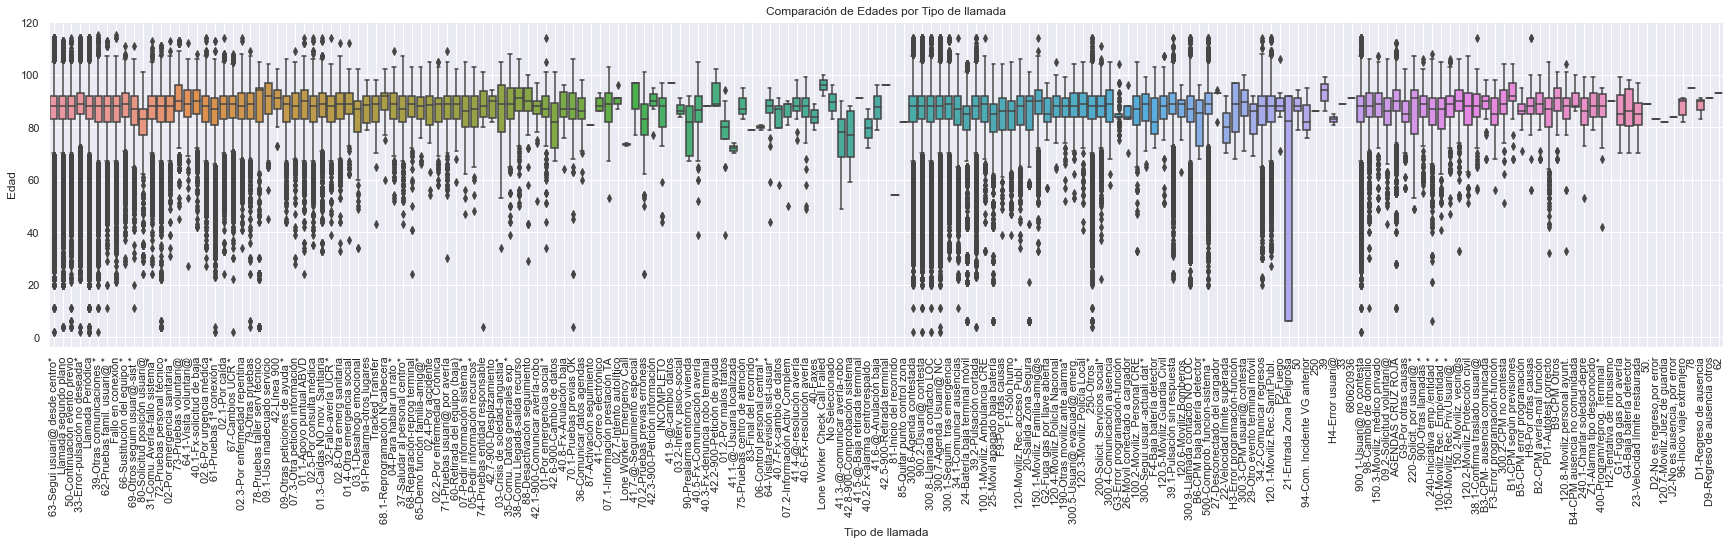

In [38]:
# Comparar edades por tipo de incidente
plt.figure(figsize=(30, 6))
sns.boxplot(x='TEXT', y='Edad', data=llam)
plt.xlabel('Tipo de llamada')
plt.ylabel('Edad')
plt.title('Comparación de Edades por Tipo de llamada')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

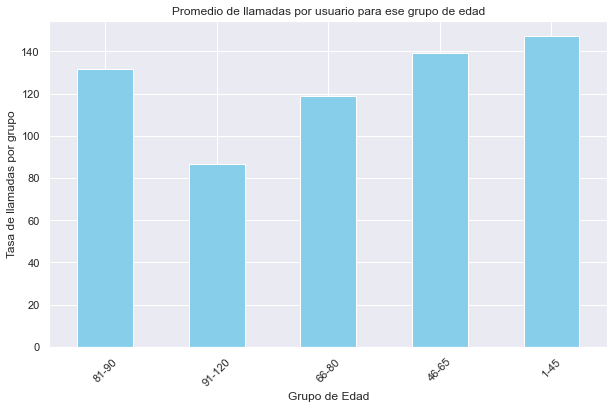

In [39]:
# Definir los rangos de edades
rangos_edades = [(1, 45), (46, 65), (66, 80), (81, 90), (91, 120)]
etiquetas_rangos = ['1-45', '46-65', '66-80', '81-90', '91-120']

# Crear una columna para el grupo de edad
llam['Grupo Edad'] = pd.cut(llam['Edad'], bins=[r[0] for r in rangos_edades] + [rangos_edades[-1][1]], labels=etiquetas_rangos)

grupos = df['Grupo Edad'].value_counts()
# grupos = grupos.to_dict()

# Calcular la frecuencia de incidentes por grupo de edad
frecuencia_llamadas = llam['Grupo Edad'].value_counts()

# # Convertir las categorías a strings
# frecuencia_por_grupo.index = frecuencia_por_grupo.index.astype(str)

# # Ahora mapear con el diccionario 'grupos' y realizar la división
# tasa_llamadas = frecuencia_por_grupo.divide(frecuencia_por_grupo.index.map(grupos))

# # Dividir la frecuencia de llamadas por el número de usuarios en cada grupo
# tasa_llamadas = frecuencia_por_grupo / frecuencia_por_grupo.index.map(grupos)
tasa_llamadas = frecuencia_llamadas / grupos

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
tasa_llamadas.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de llamadas por grupo')
plt.title('Promedio de llamadas por usuario para ese grupo de edad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

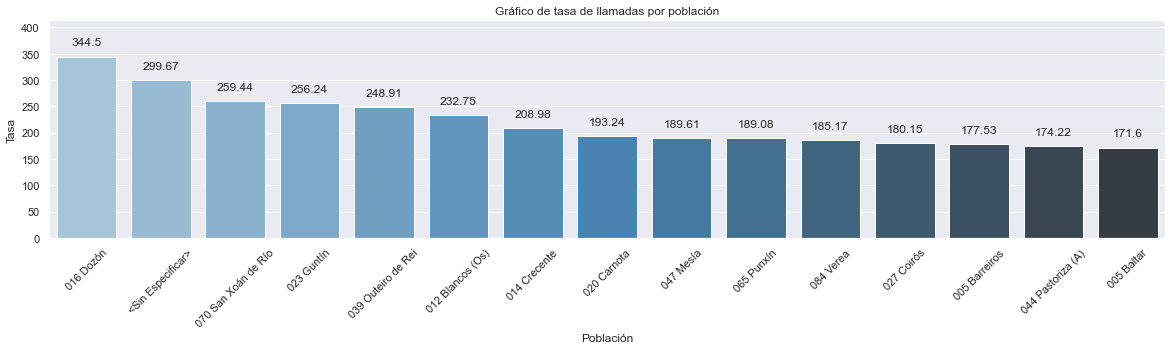

In [40]:
# Gráfico de barras de una columna categórica
# Calcular la frecuencia de cada categoría
frecuencia = llam['POBLACION_TEXT'].value_counts()
grupos = df['POBLACION_TEXT'].value_counts()

tasa = frecuencia / grupos

# Ordenar la serie tasa de mayor a menor
tasa_ordenada = tasa.sort_values(ascending=False)

top_n = 15
frecuencias_top = tasa_ordenada.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(20,4))
sns.barplot(x=frecuencias_top.index, y=frecuencias_top.values, palette="Blues_d")
plt.title('Gráfico de tasa de llamadas por población')
plt.xlabel('Población')
plt.ylabel('Tasa')
plt.xticks(rotation=45)
plt.ylim(0, 1.2*frecuencias_top.max())  # Aumentar margen vertical

# Etiquetar las barras con sus respectivas tasas
for index, value in enumerate(frecuencias_top):
    plt.text(index, value + 0.05*frecuencias_top.max(), str(round(value, 2)), ha='center', va='bottom')  # Se ha añadido un pequeño ajuste al valor "y"

plt.show()

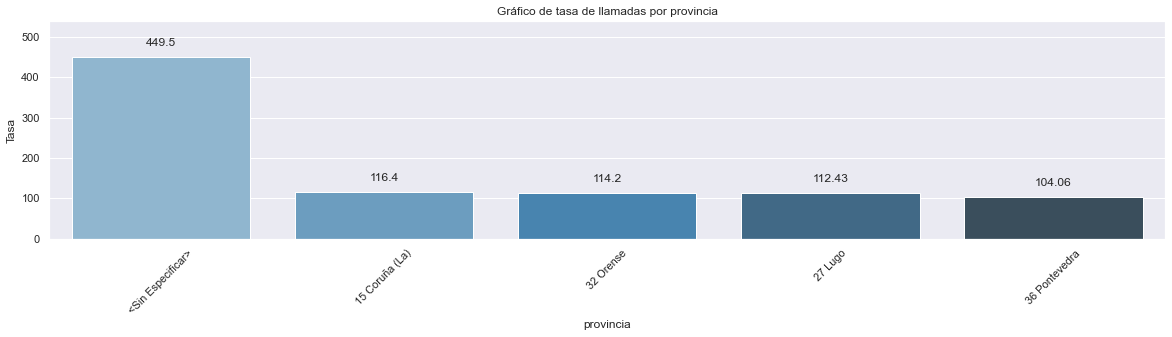

In [41]:
# Gráfico de barras de una columna categórica
# Calcular la frecuencia de cada categoría
frecuencia = llam['PROVINCIA_TEXT'].value_counts()
grupos = df['PROVINCIA_TEXT'].value_counts()

tasa = frecuencia / grupos

# Ordenar la serie tasa de mayor a menor
tasa_ordenada = tasa.sort_values(ascending=False)

top_n = 15
frecuencias_top = tasa_ordenada.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(20,4))
sns.barplot(x=frecuencias_top.index, y=frecuencias_top.values, palette="Blues_d")
plt.title('Gráfico de tasa de llamadas por provincia')
plt.xlabel('provincia')
plt.ylabel('Tasa')
plt.xticks(rotation=45)
plt.ylim(0, 1.2*frecuencias_top.max())  # Aumentar margen vertical

# Etiquetar las barras con sus respectivas tasas
for index, value in enumerate(frecuencias_top):
    plt.text(index, value + 0.05*frecuencias_top.max(), str(round(value, 2)), ha='center', va='bottom')  # Se ha añadido un pequeño ajuste al valor "y"

plt.show()

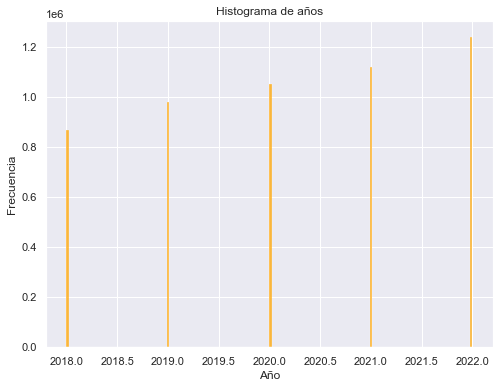

In [42]:
llam['ARRIVAL_TIME'] = pd.to_datetime(llam['ARRIVAL_TIME'])
año = llam['año']
plt.figure(figsize=(8, 6))
sns.histplot(año, color='orange')
plt.title('Histograma de años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

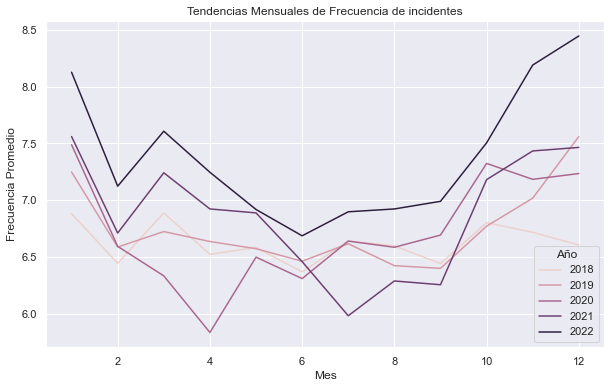

In [43]:
# Análisis de tendencias mensuales y anuales
# Agregar columnas para el año y el mes
llam['mes'] = llam['ARRIVAL_TIME'].dt.month
llam['hora'] = llam['ARRIVAL_TIME'].dt.hour

# Calcular la frecuencia de llamadas por año y mes
frecuencia = llam.groupby([llam['año'],llam['mes'], 'LOCATION_REF']).size().reset_index(name='frecuencia')

tendencias = frecuencia.groupby(['año', 'mes'])['frecuencia'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='mes', y='frecuencia', hue='año', data=tendencias)
plt.title('Tendencias Mensuales de Frecuencia de incidentes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia Promedio')
plt.legend(title='Año')
plt.show()

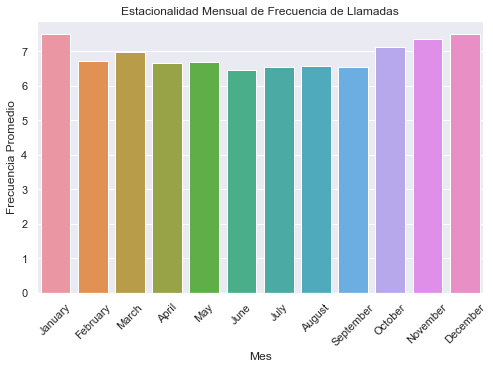

In [44]:
# Análisis de estacionalidad
estacionalidad = frecuencia.groupby('mes')['frecuencia'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='mes', y='frecuencia', data=estacionalidad)
plt.title('Estacionalidad Mensual de Frecuencia de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Frecuencia Promedio')
plt.xticks(range(0, 12), calendar.month_name[1:], rotation=45)
plt.show()

In [45]:
# Convertir la columna 'ARRIVAL_TIME' a tipo datetime
llam['ARRIVAL_TIME'] = pd.to_datetime(llam['ARRIVAL_TIME'])
llam['dia'] = llam['ARRIVAL_TIME'].dt.day

frecuencia_llamadas = llam['LOCATION_REF'].value_counts().reset_index()
frecuencia_llamadas.columns = ['LOCATION_REF', 'frecuencia']

# Calcular la cantidad de llamadas por usuario y por año
frecuencia_por_usuario_y_año = llam.groupby(['LOCATION_REF', 'año']).size().reset_index(name='Num_Llamadas')
frecuencia_por_usuario_y_mes = llam.groupby(['LOCATION_REF', 'mes']).size().reset_index(name='Num_Llamadas')
frecuencia_por_usuario_y_dia = llam.groupby(['LOCATION_REF', 'dia']).size().reset_index(name='Num_Llamadas')

# Calcular la media de llamadas al año para cada usuario
media_frecuencias_por_usuario = frecuencia_por_usuario_y_año.groupby('LOCATION_REF')['Num_Llamadas'].mean().reset_index(name='Media_Frec_Año')
frecuencia_por_usuario_y_mes = frecuencia_por_usuario_y_mes.groupby('LOCATION_REF')['Num_Llamadas'].mean().reset_index(name='Media_Frec_Mes')
frecuencia_por_usuario_y_dia = frecuencia_por_usuario_y_dia.groupby('LOCATION_REF')['Num_Llamadas'].mean().reset_index(name='Media_Frec_Dia')

# Combinar la información con frecuencia_llamadas
frecuencia_llamadas = frecuencia_llamadas.merge(media_frecuencias_por_usuario, on='LOCATION_REF')
frecuencia_llamadas = frecuencia_llamadas.merge(frecuencia_por_usuario_y_mes, on='LOCATION_REF')
frecuencia_llamadas = frecuencia_llamadas.merge(frecuencia_por_usuario_y_dia, on='LOCATION_REF')

print(frecuencia_llamadas)

media_frecuencias = frecuencia_llamadas['frecuencia'].mean()

print(media_frecuencias)

       LOCATION_REF  frecuencia  Media_Frec_Año  Media_Frec_Mes  \
0             54197       13486     4495.333333     1123.833333   
1              2390        8754     1750.800000      729.500000   
2             27663        6345     2115.000000      528.750000   
3             20509        4916      983.200000      409.666667   
4             34017        4806     1602.000000      400.500000   
...             ...         ...             ...             ...   
29374         49531           1        1.000000        1.000000   
29375         43090           1        1.000000        1.000000   
29376         23170           1        1.000000        1.000000   
29377         35393           1        1.000000        1.000000   
29378         48679           1        1.000000        1.000000   

       Media_Frec_Dia  
0          435.032258  
1          282.387097  
2          204.677419  
3          158.580645  
4          155.032258  
...               ...  
29374        1.000000  
293

In [46]:
# Agrupar por LOCATION_REF y el año de ARRIVAL_TIME para contar las llamadas
llamadas_anuales = llam.groupby(['LOCATION_REF', llam['ARRIVAL_TIME'].dt.year]).size().reset_index(name='count')

# Calcular la media de llamadas por año para cada usuario
media_llamadas_por_usuario = llamadas_anuales.groupby('LOCATION_REF')['count'].agg(
    promedio='mean',
    maximo='max',
    total='sum'
).sort_values(by='total', ascending=False)

print("Usuarios más activos por media anual de llamadas:")
print(media_llamadas_por_usuario)


Usuarios más activos por media anual de llamadas:
                 promedio  maximo  total
LOCATION_REF                            
54197         4495.333333    6588  13486
2390          1750.800000    2228   8754
27663         2115.000000    4418   6345
20509          983.200000    1232   4916
34017         1602.000000    2220   4806
...                   ...     ...    ...
21003            1.000000       1      1
21044            1.000000       1      1
21048            1.000000       1      1
21084            1.000000       1      1
57254            1.000000       1      1

[29379 rows x 3 columns]


In [47]:
valores_buscados = [54197, 2390, 20509, 27663]
resultados = llam[llam['LOCATION_REF'].isin(valores_buscados)]
resultados

,CALL_DEF,MEANING,ARRIVAL_TIME,REASON_REF,TEXT,CALL_ENTITY_TYPE,ENTITY_NAME,LOCATION_REF,Edad,PROVINCIA_TEXT,POBLACION_TEXT,año,Grupo Edad,mes,hora,dia
1087,7701440,Telefono,2020-02-27 21:31:36,1074,50-Continuación evento previo,2,Vivienda/EPEC,2390,NaN,NaN,NaN,2020,NaN,2,21,27
3070,7704919,Alarma autochequeo sistem,2020-02-29 02:55:30,13,Llamada Periódica,2,Vivienda/EPEC,20509,71.0,15 Coruña (La),019 Carballo,2020,66-80,2,2,29
21502,7734532,Telefono,2020-03-09 22:03:38,1044,39-Otras comunicaciones *,2,Vivienda/EPEC,20509,71.0,15 Coruña (La),019 Carballo,2020,66-80,3,22,9
22701,7737465,Fallo de Alarma,2020-03-10 22:53:15,30,Fallo en conexión,2,Vivienda/EPEC,20509,71.0,15 Coruña (La),019 Carballo,2020,66-80,3,22,10
22923,7737718,Primera UCR - Primer Residente,2020-03-11 01:12:01,1011,02.5-Por consulta médica,2,Vivienda/EPEC,20509,71.0,15 Coruña (La),019 Carballo,2020,66-80,3,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258904,11174001,Llamada saliente,2022-12-30 11:31:56,2036,900-Otras llamadas *,8,Contacto,54197,NaN,NaN,NaN,2022,NaN,12,11,30
5258909,11174012,Llamada saliente,2022-12-30 11:35:51,2036,900-Otras llamadas *,8,Contacto,54197,NaN,NaN,NaN,2022,NaN,12,11,30
5258927,11174086,Llamada saliente,2022-12-30 11:57:32,2036,900-Otras llamadas *,8,Contacto,54197,NaN,NaN,NaN,2022,NaN,12,11,30
5258932,11174120,Llamada saliente,2022-12-30 12:05:58,2036,900-Otras llamadas *,8,Contacto,54197,NaN,NaN,NaN,2022,NaN,12,12,30


In [48]:
# Segmentación de usuarios
frecuencia_llamadas['segmento'] = pd.cut(
    frecuencia_llamadas['frecuencia'],
    bins=[0, 160, 300, float('inf')],
    labels=['Ocasional', 'Frecuente', 'Muy Frecuente']
)
segmentacion_usuarios = frecuencia_llamadas.groupby('segmento')['LOCATION_REF'].count()
print("Segmentación de Usuarios:")
print(segmentacion_usuarios)

Segmentación de Usuarios:
segmento
Ocasional        17188
Frecuente         6481
Muy Frecuente     5710
Name: LOCATION_REF, dtype: int64


In [49]:
llamadas = llam.merge(frecuencia_llamadas, on='LOCATION_REF', how='left')
# Definir un diccionario de mapeo de categorías a números
mapeo = {'Muy Frecuente': 0, 'Frecuente': 1, 'Ocasional': 2}

# Aplicar el mapeo a la columna
llamadas['segmento'] = llamadas['segmento'].map(mapeo)

# Eliminar duplicados en el DataFrame de usuarios basados en la columna 'usuario'
llamadas = llamadas.merge(df_usuarios_sin_duplicados, on='LOCATION_REF', how='left')

In [50]:
llamadas.isnull().sum()

CALL_DEF                       0
MEANING                        2
ARRIVAL_TIME                   0
REASON_REF                     0
TEXT_x                         9
CALL_ENTITY_TYPE               0
ENTITY_NAME                    0
LOCATION_REF                   0
Edad_x                     43327
PROVINCIA_TEXT_x           40083
POBLACION_TEXT_x           40083
año                            0
Grupo Edad_x               43327
mes                            0
hora                           0
dia                            0
frecuencia                     0
Media_Frec_Año                 0
Media_Frec_Mes                 0
Media_Frec_Dia                 0
segmento                       0
USUARIO_REF                40083
TIPOLOGIA_USUARIO          40083
SITUACION                  40083
USUARIOS_SITUACION_TEXT    40083
MOTIVO                     40083
USUARIOS_MOTIVO_TEXT       40083
POBLACION_REF              40083
POBLACION_TEXT_y           40083
PROVINCIA_REF              40083
PROVINCIA_

In [51]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ['CALL_DEF', 'PROVINCIA_TEXT_x', 'POBLACION_TEXT_x', 'Edad_x', 'año', 'mes', 'hora', 'dia', 'USUARIO_REF', 'DATE_OF_BIRTH', 'ADDRESS_TOWN', 'ADDRESS_COUNTY', 'Grupo Edad_y', 'PROVINCIA_REF', 'MOTIVO', 'LOCATION_REF', 'Media_Frec_Dia']

# Eliminar las columnas
call2 = llamadas.drop(columns=columnas_a_eliminar)

In [52]:
call2 = call2.dropna()

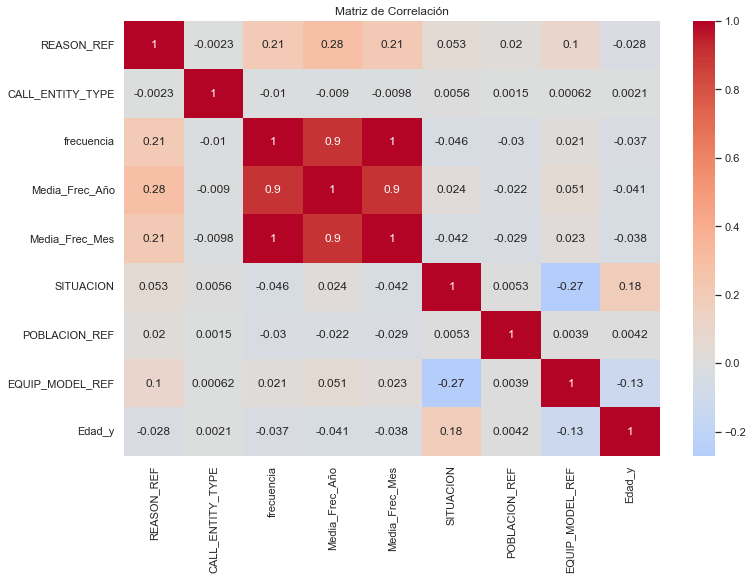

In [53]:
# Filtrar las columnas numéricas (todos los tipos numéricos)
columnas_numericas = call2.select_dtypes(include=['number'])

matriz_correlacion = columnas_numericas.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [54]:
# Calcular la frecuencia de llamadas por año y mes
monthhour = llam.groupby([llam['mes'], llam['hora']]).size().reset_index(name='frecuencia')

# Utiliza el método pivot para darle forma al DataFrame
monthhour = monthhour.pivot(index=['mes'], columns='hora', values='frecuencia')

# Si algunas horas no tienen datos, llena los valores NaN con 0
monthhour = monthhour.fillna(0)
monthhour

hora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
mes,,,,,,,,,,,,,,,,,,,,,
1,15290,12107,10418,10982,10658,10143,9407,8892,10424,25873,...,25403,21573,25387,25965,24212,23471,24573,18846,19357,17175
2,13152,10361,8493,8881,9109,8365,7593,7313,8320,23951,...,23517,21623,25045,24941,22131,19051,17541,16126,17180,14741
3,14275,11661,8769,9333,9350,8882,7968,7885,9316,26203,...,25619,23891,26613,25595,22192,18621,17287,17067,18355,16110
4,15160,13308,10569,8259,8741,9283,8501,7650,8614,25581,...,25648,23130,26730,24351,19752,16165,14888,13203,15226,15875
5,14965,13241,10505,8337,8584,8778,7987,7405,8326,25135,...,25552,22097,25696,24638,21762,19653,17244,14137,16176,16286
6,14830,12806,9703,7964,8252,8499,7710,7031,8441,24122,...,24358,19254,22185,22831,21285,19782,19077,13706,16009,16130
7,15402,13203,9986,8335,8550,8604,8024,7216,8585,23895,...,24321,19458,22849,22903,20893,20071,20646,14675,17020,16694
8,15284,13246,10034,8197,8424,8611,8044,7359,8454,24497,...,25050,19961,23831,23279,21325,20833,21491,15363,16749,16440
9,14813,13049,9858,8565,8755,8639,8062,7485,8802,24770,...,26370,19371,22659,22807,20882,21448,20345,14639,16444,15802


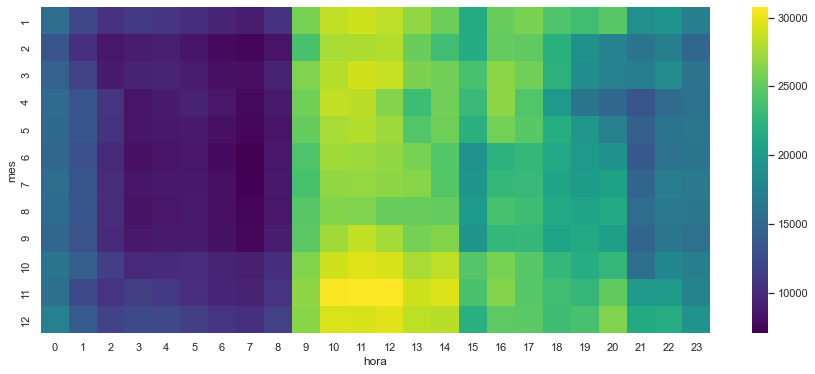

In [55]:
plt.figure(figsize=(15,6))
sns.heatmap(monthhour,cmap='viridis')
plt.style.use('dark_background')

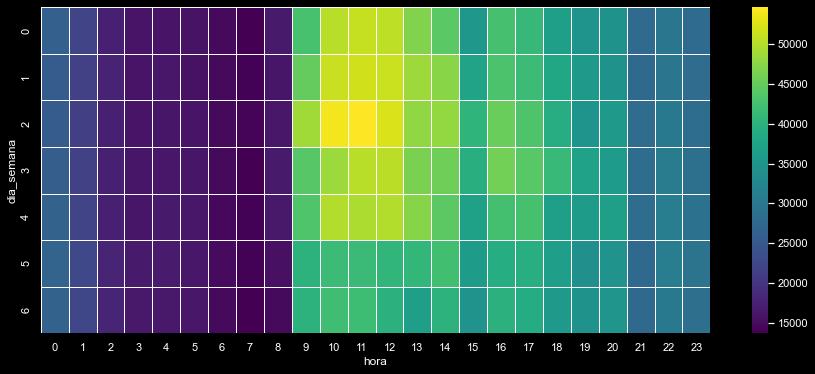

In [56]:
llam['dia_semana'] = llam['ARRIVAL_TIME'].dt.dayofweek  # 0: Lunes, 1: Martes, ..., 6: Domingo

# Agrupa por año, mes, día de la semana y hora, y calcula la frecuencia de llamadas
frecuencia_por_dia_hora = llam.groupby(['dia_semana', 'hora']).size().reset_index(name='frecuencia')

# Utiliza el método pivot para darle forma al DataFrame
weekhour = frecuencia_por_dia_hora.pivot_table(index=['dia_semana'], columns='hora', values='frecuencia', fill_value=0)
plt.figure(figsize=(15,6))
sns.heatmap(weekhour,cmap='viridis',linewidths=1)
plt.style.use('dark_background')

- Incidentes

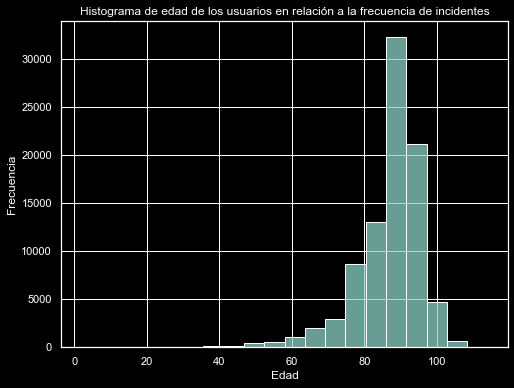

In [57]:
# Histograma de una columna numérica
plt.figure(figsize=(8, 6))
sns.histplot(inci['Edad'], bins=20)
plt.title('Histograma de edad de los usuarios en relación a la frecuencia de incidentes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [58]:
media = np.mean(inci['Edad'])
mediana = np.median(inci['Edad'][~np.isnan(inci['Edad'])])
desviacion_estandar = np.std(inci['Edad'])

print("Media:", media)
print("Mediana:", mediana)
print("Desviación Estándar:", desviacion_estandar)

Media: 86.74644942850001
Mediana: 88.0
Desviación Estándar: 9.222840295653072


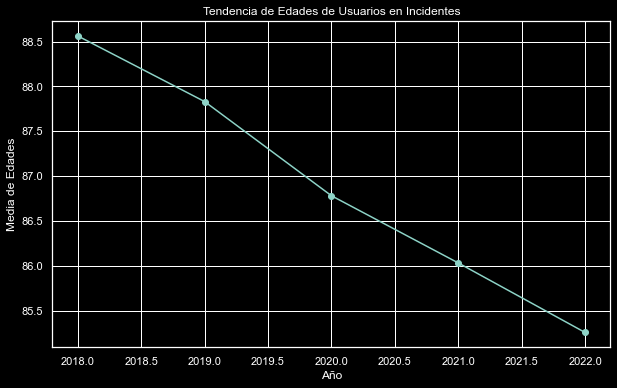

In [59]:
# Agrupar por año y calcular la media de edades
inci['año'] = inci['INCI_DATE'].dt.year
edades_por_año = inci.groupby('año')['Edad'].mean()

# Crear gráfico de tendencias
plt.figure(figsize=(10, 6))
plt.plot(edades_por_año.index, edades_por_año.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Media de Edades')
plt.title('Tendencia de Edades de Usuarios en Incidentes')
plt.grid(True)
plt.show()

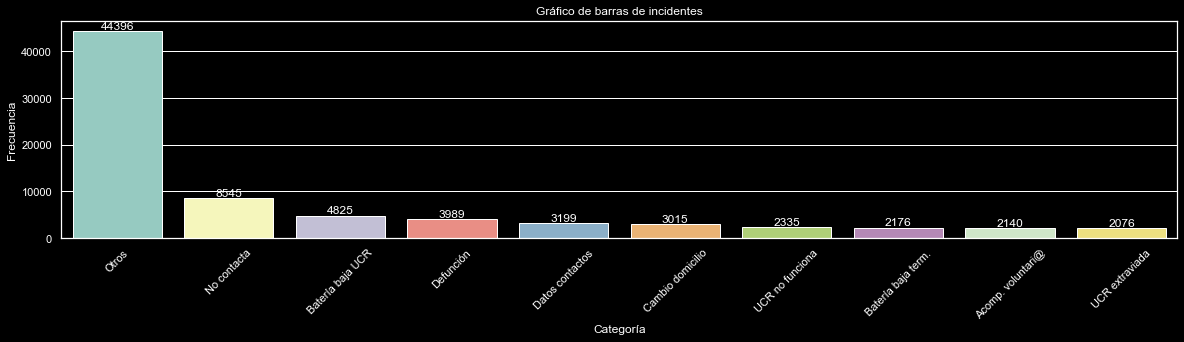

In [60]:
# Gráfico de barras de una columna categórica
frecuencias = inci['TEXT'].value_counts()

top_n = 10
frecuencias_top = frecuencias.head(top_n)

plt.figure(figsize=(20,4))  # Aquí también ajusta el tamaño del gráfico según tus necesidades
sns.countplot(x='TEXT', data=inci, order=frecuencias_top.index)
plt.title('Gráfico de barras de incidentes')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45) 
for index, value in enumerate(frecuencias_top):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

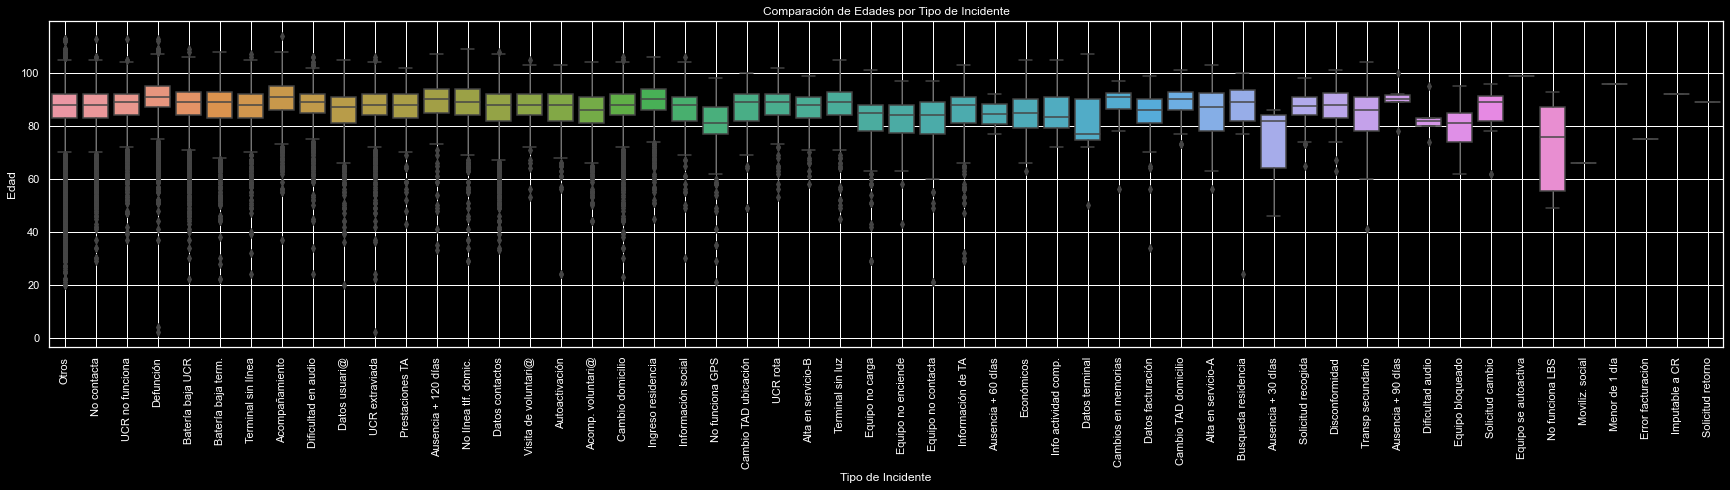

In [61]:
# Comparar edades por tipo de incidente
plt.figure(figsize=(30, 6))
sns.boxplot(x='TEXT', y='Edad', data=inci)
plt.xlabel('Tipo de Incidente')
plt.ylabel('Edad')
plt.title('Comparación de Edades por Tipo de Incidente')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

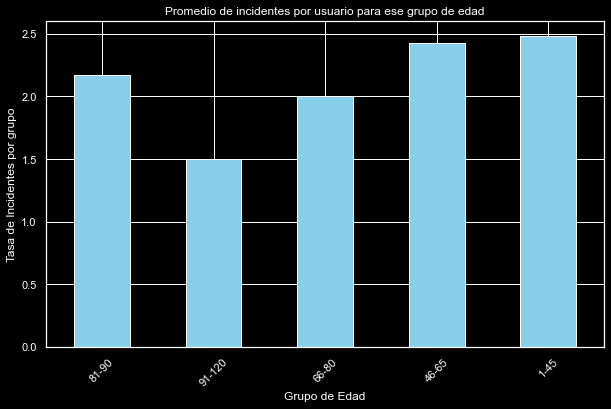

In [62]:
# Definir los rangos de edades
rangos_edades = [(1, 45), (46, 65), (66, 80), (81, 90), (91, 120)]
etiquetas_rangos = ['1-45', '46-65', '66-80', '81-90', '91-120']

# Crear una columna para el grupo de edad
inci['Grupo Edad'] = pd.cut(inci['Edad'], bins=[r[0] for r in rangos_edades] + [rangos_edades[-1][1]], labels=etiquetas_rangos)
grupos = df['Grupo Edad'].value_counts()

# Calcular la frecuencia de incidentes por grupo de edad
frecuencia_por_grupo = inci['Grupo Edad'].value_counts()
frecuencia_por_grupo = frecuencia_por_grupo / grupos

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_por_grupo.plot(kind='bar', color='skyblue')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Incidentes por grupo')
plt.title('Promedio de incidentes por usuario para ese grupo de edad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

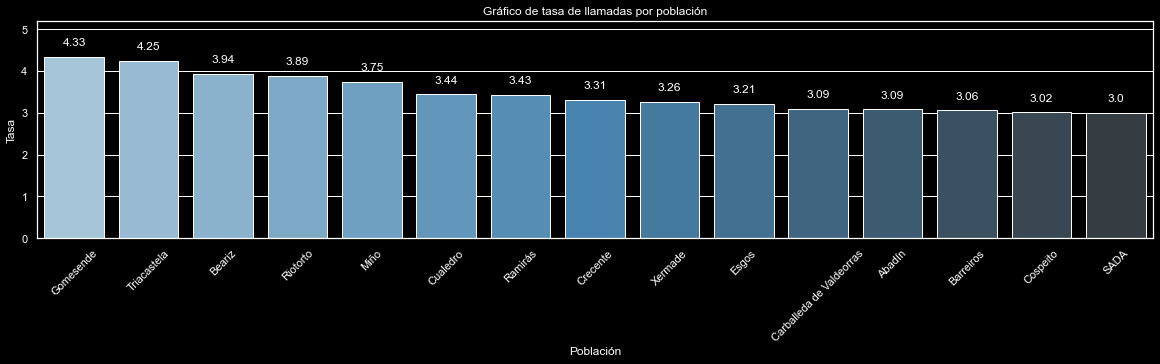

In [63]:
# Gráfico de barras de una columna categórica
# Calcular la frecuencia de cada categoría
frecuencia = inci['ADDRESS_TOWN'].value_counts()
grupos = df['ADDRESS_TOWN'].value_counts()

tasa = frecuencia / grupos

# Ordenar la serie tasa de mayor a menor
tasa_ordenada = tasa.sort_values(ascending=False)

top_n = 15
frecuencias_top = tasa_ordenada.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(20,4))
sns.barplot(x=frecuencias_top.index, y=frecuencias_top.values, palette="Blues_d")
plt.title('Gráfico de tasa de llamadas por población')
plt.xlabel('Población')
plt.ylabel('Tasa')
plt.xticks(rotation=45)
plt.ylim(0, 1.2*frecuencias_top.max())  # Aumentar margen vertical

# Etiquetar las barras con sus respectivas tasas
for index, value in enumerate(frecuencias_top):
    plt.text(index, value + 0.05*frecuencias_top.max(), str(round(value, 2)), ha='center', va='bottom')  # Se ha añadido un pequeño ajuste al valor "y"

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


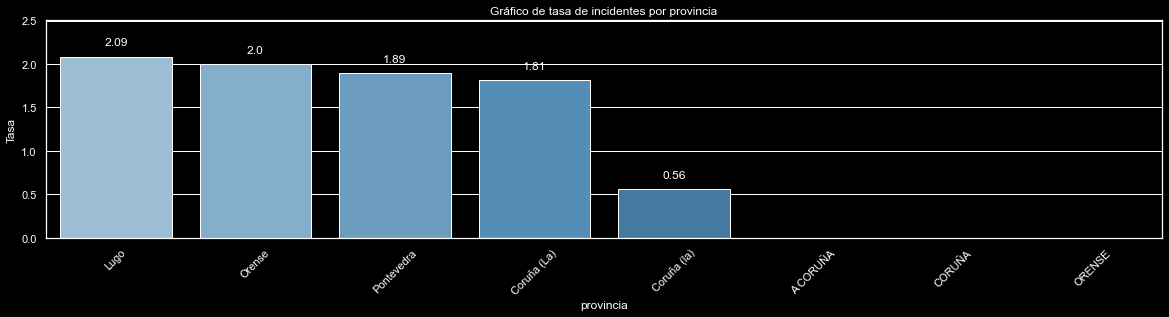

In [64]:
# Gráfico de barras de una columna categórica
# Calcular la frecuencia de cada categoría
frecuencia = inci['ADDRESS_COUNTY'].value_counts()
grupos = df['ADDRESS_COUNTY'].value_counts()

tasa = frecuencia / grupos

# Ordenar la serie tasa de mayor a menor
tasa_ordenada = tasa.sort_values(ascending=False)

top_n = 15
frecuencias_top = tasa_ordenada.head(top_n)

# Crear el gráfico de barras
plt.figure(figsize=(20,4))
sns.barplot(x=frecuencias_top.index, y=frecuencias_top.values, palette="Blues_d")
plt.title('Gráfico de tasa de incidentes por provincia')
plt.xlabel('provincia')
plt.ylabel('Tasa')
plt.xticks(rotation=45)
plt.ylim(0, 1.2*frecuencias_top.max())  # Aumentar margen vertical

# Etiquetar las barras con sus respectivas tasas
for index, value in enumerate(frecuencias_top):
    plt.text(index, value + 0.05*frecuencias_top.max(), str(round(value, 2)), ha='center', va='bottom')  # Se ha añadido un pequeño ajuste al valor "y"

plt.show()

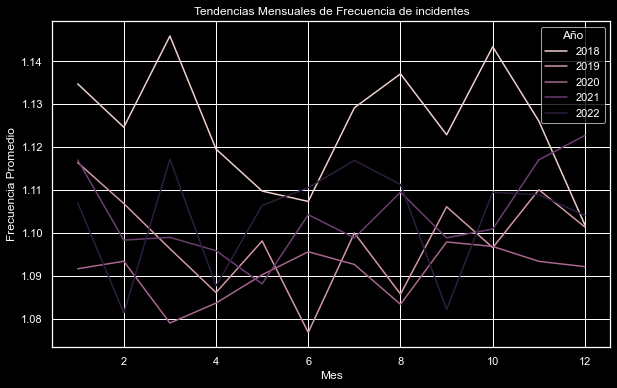

In [65]:
# Análisis de tendencias mensuales y anuales
# Agregar columnas para el año y el mes
inci['mes'] = inci['INCI_DATE'].dt.month
inci['dia'] = inci['INCI_DATE'].dt.day
# Calcular la frecuencia de llamadas por año y mes
frecuencia = inci.groupby([inci['año'],inci['mes'], 'RESIDENT_DEF']).size().reset_index(name='frecuencia')

tendencias = frecuencia.groupby(['año', 'mes'])['frecuencia'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='mes', y='frecuencia', hue='año', data=tendencias)
plt.title('Tendencias Mensuales de Frecuencia de incidentes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia Promedio')
plt.legend(title='Año')
plt.show()

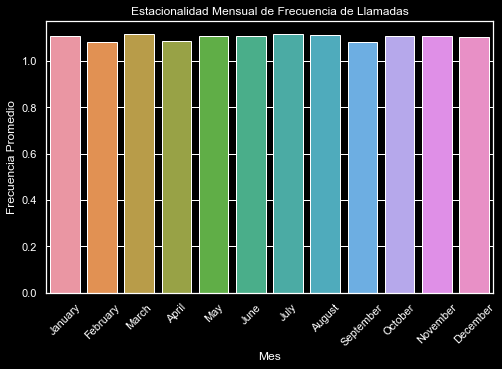

In [66]:
# Análisis de estacionalidad
frecuencia_2022 = frecuencia[frecuencia['año'] == 2022]
estacionalidad = frecuencia_2022.groupby('mes')['frecuencia'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='mes', y='frecuencia', data=estacionalidad)
plt.title('Estacionalidad Mensual de Frecuencia de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Frecuencia Promedio')
plt.xticks(range(0, 12), calendar.month_name[1:], rotation=45)
plt.show()

Text(0.5, 1.0, 'Frequency of calls per week')

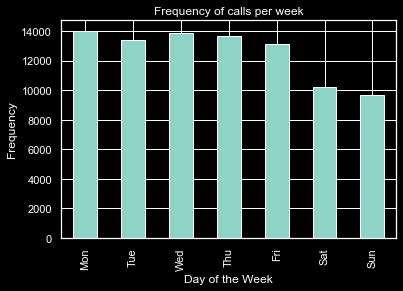

In [67]:
inci['dia'] = inci['INCI_DATE'].dt.strftime('%a') 
weeks = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
inci["dia"].value_counts().reindex(weeks).plot(kind="bar")
plt.xlabel('Day of the Week') 
plt.ylabel('Frequency') 
plt.title('Frequency of calls per week') 

In [68]:
# Convertir la columna 'ARRIVAL_TIME' a tipo datetime
inci['INCI_DATE'] = pd.to_datetime(inci['INCI_DATE'])
inci['dia'] = inci['INCI_DATE'].dt.day

frecuencia_inci= inci['RESIDENT_DEF'].value_counts().reset_index()
frecuencia_inci.columns = ['RESIDENT_DEF', 'frecuencia']

# Calcular la cantidad de llamadas por usuario y por año
frecuencia_por_usuario_y_año = inci.groupby(['RESIDENT_DEF', 'año']).size().reset_index(name='Num_Llamadas')
frecuencia_por_usuario_y_mes = inci.groupby(['RESIDENT_DEF', 'mes']).size().reset_index(name='Num_Llamadas')
frecuencia_por_usuario_y_dia = inci.groupby(['RESIDENT_DEF', 'dia']).size().reset_index(name='Num_Llamadas')

# Calcular la media de llamadas al año para cada usuario
media_frecuencias_por_usuario = frecuencia_por_usuario_y_año.groupby('RESIDENT_DEF')['Num_Llamadas'].mean().reset_index(name='Media_Frec_Año')
frecuencia_por_usuario_y_mes = frecuencia_por_usuario_y_mes.groupby('RESIDENT_DEF')['Num_Llamadas'].mean().reset_index(name='Media_Frec_Mes')
frecuencia_por_usuario_y_dia = frecuencia_por_usuario_y_dia.groupby('RESIDENT_DEF')['Num_Llamadas'].mean().reset_index(name='Media_Frec_Dia')

# Combinar la información con frecuencia_llamadas
frecuencia_inci = frecuencia_inci.merge(media_frecuencias_por_usuario, on='RESIDENT_DEF')
frecuencia_inci = frecuencia_inci.merge(frecuencia_por_usuario_y_mes, on='RESIDENT_DEF')
frecuencia_inci = frecuencia_inci.merge(frecuencia_por_usuario_y_dia, on='RESIDENT_DEF')

print(frecuencia_inci)

media_frecuencias = frecuencia_inci['frecuencia'].mean()

print(media_frecuencias)

       RESIDENT_DEF  frecuencia  Media_Frec_Año  Media_Frec_Mes  \
0             32209          69           13.80        5.750000   
1             28565          64           12.80        5.333333   
2             46018          64           32.00        5.333333   
3             27857          60           15.00        5.000000   
4             35717          59           14.75        4.916667   
...             ...         ...             ...             ...   
24816         32148           1            1.00        1.000000   
24817         32423           1            1.00        1.000000   
24818         32550           1            1.00        1.000000   
24819         41343           1            1.00        1.000000   
24820         29162           1            1.00        1.000000   

       Media_Frec_Dia  
0            2.300000  
1            2.560000  
2            2.206897  
3            2.222222  
4            2.107143  
...               ...  
24816        1.000000  
248

In [69]:
# Agrupar por LOCATION_REF y el año de ARRIVAL_TIME para contar las llamadas
inci_anuales = inci.groupby(['RESIDENT_DEF', inci['INCI_DATE'].dt.year]).size().reset_index(name='count')

# Calcular la media de llamadas por año para cada usuario
media_inci_por_usuario = inci_anuales.groupby('RESIDENT_DEF')['count'].agg(
    promedio='mean',
    maximo='max',
    total='sum'
).sort_values(by='total', ascending=False)

print("Usuarios más activos por media anual de llamadas:")
print(media_inci_por_usuario)

Usuarios más activos por media anual de llamadas:
              promedio  maximo  total
RESIDENT_DEF                         
32209            13.80      19     69
28565            12.80      31     64
46018            32.00      51     64
27857            15.00      29     60
35717            14.75      28     59
...                ...     ...    ...
27791             1.00       1      1
40836             1.00       1      1
27792             1.00       1      1
27793             1.00       1      1
57248             1.00       1      1

[24821 rows x 3 columns]


In [70]:
valores_buscados = [32209, 28565, 46018, 27857, 35717]
resultados = inci[inci['RESIDENT_DEF'].isin(valores_buscados)]
resultados

,INCI_HISTORY_DEF,INCI_DATE,RESIDENT_DEF,INCIDENT_DEF,TEXT,DATE_OF_BIRTH,INCI_TYPE_REF,TEXT.1,ADDRESS_TOWN,ADDRESS_COUNTY,Edad,año,Grupo Edad,mes,dia
26204,141827,2021-08-27,46018,70,Cambio domicilio,1935-03-10,11,Cambio domicilio,Lalín,Pontevedra,88.0,2021,81-90,8,27
26205,142281,2021-09-03,46018,70,Cambio domicilio,1935-03-10,11,Cambio domicilio,Lalín,Pontevedra,88.0,2021,81-90,9,3
26206,143071,2021-09-17,46018,70,Cambio domicilio,1935-03-10,11,Cambio domicilio,Lalín,Pontevedra,88.0,2021,81-90,9,17
26207,143276,2021-09-21,46018,70,Cambio domicilio,1935-03-10,11,Cambio domicilio,Lalín,Pontevedra,88.0,2021,81-90,9,21
26208,143463,2021-09-24,46018,70,Cambio domicilio,1935-03-10,11,Cambio domicilio,Lalín,Pontevedra,88.0,2021,81-90,9,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151367,170285,2022-11-28,35717,38,Acomp. voluntari@,1926-04-01,6,Demandas,Ourense,Orense,97.0,2022,91-120,11,28
151368,170520,2022-12-02,35717,74,Otros,1926-04-01,13,Otros,Ourense,Orense,97.0,2022,91-120,12,2
151369,171091,2022-12-12,35717,38,Acomp. voluntari@,1926-04-01,6,Demandas,Ourense,Orense,97.0,2022,91-120,12,12
151370,171688,2022-12-21,35717,38,Acomp. voluntari@,1926-04-01,6,Demandas,Ourense,Orense,97.0,2022,91-120,12,21


In [71]:
# Segmentación de usuarios
frecuencia_inci['segmento'] = pd.cut(
    frecuencia_inci['frecuencia'],
    bins=[0, 3, 10, float('inf')],
    labels=['Ocasional', 'Frecuente', 'Muy Frecuente']
)
segmentacion_usuarios = frecuencia_inci.groupby('segmento')['RESIDENT_DEF'].count()
print("Segmentación de Usuarios:")
print(segmentacion_usuarios)

Segmentación de Usuarios:
segmento
Ocasional        15899
Frecuente         7988
Muy Frecuente      934
Name: RESIDENT_DEF, dtype: int64


In [72]:
incidentes = inci.merge(frecuencia_inci, on='RESIDENT_DEF', how='left')
# Definir un diccionario de mapeo de categorías a números
mapeo = {'Muy Frecuente': 0, 'Frecuente': 1, 'Ocasional': 2}

# Aplicar el mapeo a la columna
incidentes['segmento'] = incidentes['segmento'].map(mapeo)

# Eliminar duplicados en el DataFrame de usuarios basados en la columna 'usuario'
df_usuarios_sin_duplicados.rename(columns={'LOCATION_REF': 'RESIDENT_DEF'}, inplace=True)

incidents = incidentes.merge(df_usuarios_sin_duplicados, on='RESIDENT_DEF', how='left')

In [73]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ['INCI_HISTORY_DEF', 'DATE_OF_BIRTH_x', 'ADDRESS_TOWN_x', 'ADDRESS_COUNTY_x', 'Edad_x', 'USUARIO_REF', 'DATE_OF_BIRTH_y', 'ADDRESS_TOWN_y', 'ADDRESS_COUNTY_y', 'RESIDENT_DEF', 'Grupo Edad_x', 'año', 'mes', 'dia', 'SITUACION', 'USUARIOS_MOTIVO_TEXT', 'PROVINCIA_REF', 'PROVINCIA_TEXT', 'Media_Frec_Año', 'Media_Frec_Mes', 'Media_Frec_Dia']

# Eliminar las columnas
incidents = incidents.drop(columns=columnas_a_eliminar)

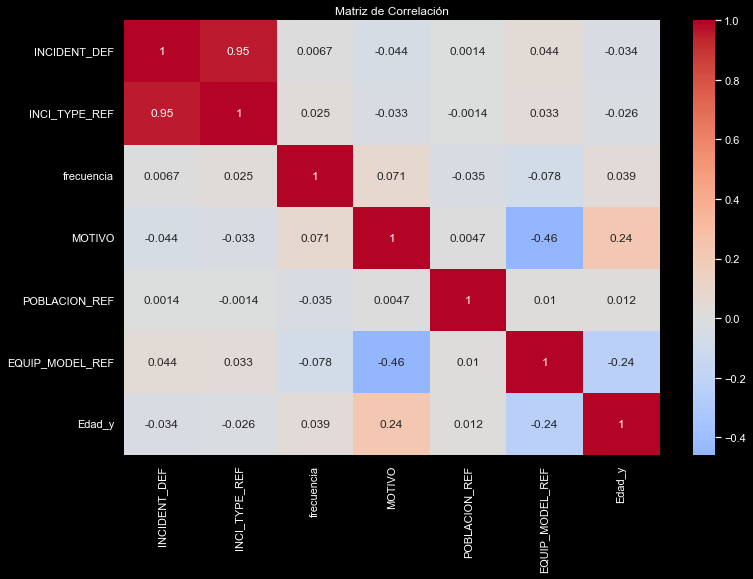

In [74]:
# Filtrar las columnas numéricas (todos los tipos numéricos)
columnas_numericas = incidents.select_dtypes(include=['number'])

matriz_correlacion = columnas_numericas.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

### MODELADO

In [75]:
mapeo = {'91-120': 0, '81-90': 1, '66-80': 2, '46-65': 3, '1-45': 4}

# Aplicar el mapeo a la columna
incidentes['Grupo Edad'] = incidentes['Grupo Edad'].map(mapeo)

# Convertir la columna 'Grupo Edad' a tipo entero y rellenar NaN con un valor específico si es necesario
incidentes['Grupo Edad'] = incidentes['Grupo Edad'].astype(pd.Int64Dtype(), errors='ignore')

# Seleccionar solo las columnas numéricas y la columna 'Grupo Edad'
columnas_numericas = incidentes.select_dtypes(include=['number'])
columnas_numericas['Grupo Edad'] = incidentes['Grupo Edad']  # Agregar de nuevo 'Grupo Edad' como columna numérica

In [76]:
columnas_numericas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88037 entries, 0 to 88036
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCI_HISTORY_DEF  88037 non-null  int64  
 1   RESIDENT_DEF      88037 non-null  int64  
 2   INCIDENT_DEF      88037 non-null  int64  
 3   INCI_TYPE_REF     88037 non-null  int64  
 4   Edad              88014 non-null  float64
 5   año               88037 non-null  int64  
 6   Grupo Edad        88014 non-null  Int64  
 7   mes               88037 non-null  int64  
 8   dia               88037 non-null  int64  
 9   frecuencia        88037 non-null  int64  
 10  Media_Frec_Año    88037 non-null  float64
 11  Media_Frec_Mes    88037 non-null  float64
 12  Media_Frec_Dia    88037 non-null  float64
dtypes: Int64(1), float64(4), int64(8)
memory usage: 9.5 MB


In [77]:
columnas_numericas = columnas_numericas.dropna()  # Elimina filas con valores nulos en cualquier columna
columnas_numericas = columnas_numericas.drop(columns=["INCI_HISTORY_DEF", "RESIDENT_DEF", 'año', 'mes', 'dia'])

In [78]:
scaler = StandardScaler()
df_std = scaler.fit_transform(columnas_numericas)
df_std = pd.DataFrame(data = df_std,columns = columnas_numericas.columns)

In [79]:
pca = PCA()
pca.fit(df_std) 

PCA()

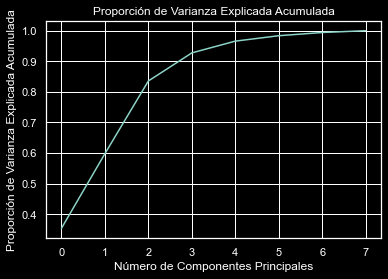

In [80]:
# Calcula la proporción de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Gráfico de la proporción de varianza explicada acumulada
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(cumulative_variance_ratio)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.title('Proporción de Varianza Explicada Acumulada')
plt.show()

In [81]:
pca = PCA(n_components = 2)
pca.fit(df_std)
pca.components_

array([[ 0.05648478,  0.06677271, -0.09314181,  0.0873848 ,  0.5580452 ,
         0.51733155,  0.51851124,  0.35796521],
       [ 0.69940273,  0.69843222, -0.06329245,  0.05986664, -0.06883501,
        -0.04551075, -0.08820769,  0.02912418]])

In [82]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = columnas_numericas.columns,
              index = ['Component 1', 'Component 2'])
df_pca_comp

,INCIDENT_DEF,INCI_TYPE_REF,Edad,Grupo Edad,frecuencia,Media_Frec_Año,Media_Frec_Mes,Media_Frec_Dia
Component 1,0.056485,0.066773,-0.093142,0.087385,0.558045,0.517332,0.518511,0.357965
Component 2,0.699403,0.698432,-0.063292,0.059867,-0.068835,-0.045511,-0.088208,0.029124


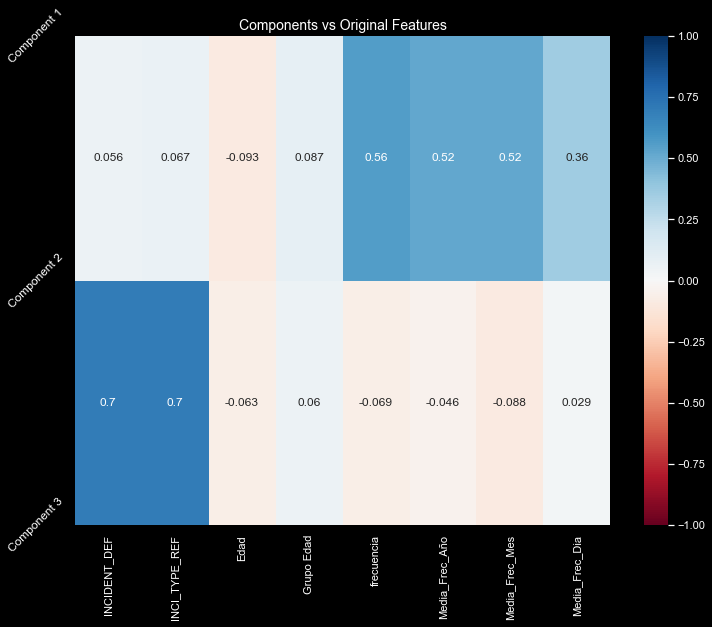

In [83]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [84]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5264745 entries, 0 to 5264744
Data columns (total 38 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   CALL_DEF                 int64         
 1   MEANING                  object        
 2   ARRIVAL_TIME             datetime64[ns]
 3   REASON_REF               int64         
 4   TEXT_x                   object        
 5   CALL_ENTITY_TYPE         int64         
 6   ENTITY_NAME              object        
 7   LOCATION_REF             int64         
 8   Edad_x                   float64       
 9   PROVINCIA_TEXT_x         object        
 10  POBLACION_TEXT_x         object        
 11  año                      int64         
 12  Grupo Edad_x             category      
 13  mes                      int64         
 14  hora                     int64         
 15  dia                      int64         
 16  frecuencia               int64         
 17  Media_Frec_Año           fl

In [85]:
# Definir un diccionario de mapeo de categorías a números
mapeo = {'91-120': 0, '81-90': 1, '66-80': 2, '46-65': 3, '1-45': 4}

# Aplicar el mapeo a la columna
llamadas['Grupo Edad'] = llamadas['Grupo Edad_y'].map(mapeo)

# Convertir la columna 'Grupo Edad' a tipo entero y rellenar NaN con un valor específico si es necesario
llamadas['Grupo Edad'] = llamadas['Grupo Edad'].astype(pd.Int64Dtype(), errors='ignore')

# Seleccionar solo las columnas numéricas y la columna 'Grupo Edad'
llamadas = llamadas.select_dtypes(include=['number'])
llamadas['Grupo Edad'] = llamadas['Grupo Edad']  # Agregar de nuevo 'Grupo Edad' como columna numérica
llamadas = llamadas.dropna()  # Elimina filas con valores nulos en cualquier columna

In [86]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5221418 entries, 0 to 5264620
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   CALL_DEF          int64  
 1   REASON_REF        int64  
 2   CALL_ENTITY_TYPE  int64  
 3   LOCATION_REF      int64  
 4   Edad_x            float64
 5   año               int64  
 6   mes               int64  
 7   hora              int64  
 8   dia               int64  
 9   frecuencia        int64  
 10  Media_Frec_Año    float64
 11  Media_Frec_Mes    float64
 12  Media_Frec_Dia    float64
 13  USUARIO_REF       float64
 14  SITUACION         float64
 15  MOTIVO            float64
 16  POBLACION_REF     float64
 17  PROVINCIA_REF     float64
 18  EQUIP_MODEL_REF   float64
 19  Edad_y            float64
 20  Grupo Edad        Int64  
dtypes: Int64(1), float64(11), int64(9)
memory usage: 881.4 MB


In [87]:
llamadas = llamadas.drop(columns=['CALL_DEF', 'LOCATION_REF', 'Edad_x', 'año', 'mes', 'dia', 'hora', 'USUARIO_REF', 'SITUACION', 'PROVINCIA_REF', 'Media_Frec_Año', 'Media_Frec_Dia'])

In [88]:
scaler = StandardScaler()
df_std = scaler.fit_transform(llamadas)
df_std = pd.DataFrame(data = df_std,columns = llamadas.columns)

In [89]:
pca = PCA()
pca.fit(df_std) 

PCA()

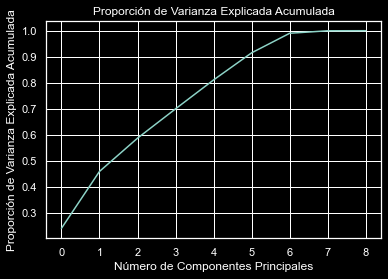

In [90]:
# Calcula la proporción de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Gráfico de la proporción de varianza explicada acumulada
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(cumulative_variance_ratio)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.title('Proporción de Varianza Explicada Acumulada')
plt.show()

In [91]:
pca = PCA(n_components = 4)
pca.fit(df_std)
pca.components_

array([[ 0.21624209, -0.01162365,  0.52083942,  0.52217769, -0.23261438,
        -0.02760691,  0.18227543, -0.40578924,  0.39547462],
       [ 0.15077056, -0.00637675,  0.43581441,  0.43560056,  0.18830933,
        -0.01648123, -0.15656894,  0.51354132, -0.52304395],
       [-0.10904564,  0.00454493,  0.07475328,  0.07492905,  0.58356894,
        -0.04733162, -0.70599491, -0.26190479,  0.25897888],
       [ 0.40159393,  0.15980723, -0.05059212, -0.04553415,  0.17437582,
         0.8804271 ,  0.03557709, -0.03084659,  0.02783863]])

In [92]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = llamadas.columns,
              index = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])
df_pca_comp

,REASON_REF,CALL_ENTITY_TYPE,frecuencia,Media_Frec_Mes,MOTIVO,POBLACION_REF,EQUIP_MODEL_REF,Edad_y,Grupo Edad
Component 1,0.216242,-0.011624,0.520839,0.522178,-0.232614,-0.027607,0.182275,-0.405789,0.395475
Component 2,0.150771,-0.006377,0.435814,0.435601,0.188309,-0.016481,-0.156569,0.513541,-0.523044
Component 3,-0.109046,0.004545,0.074753,0.074929,0.583569,-0.047332,-0.705995,-0.261905,0.258979
Component 4,0.401594,0.159807,-0.050592,-0.045534,0.174376,0.880427,0.035577,-0.030847,0.027839


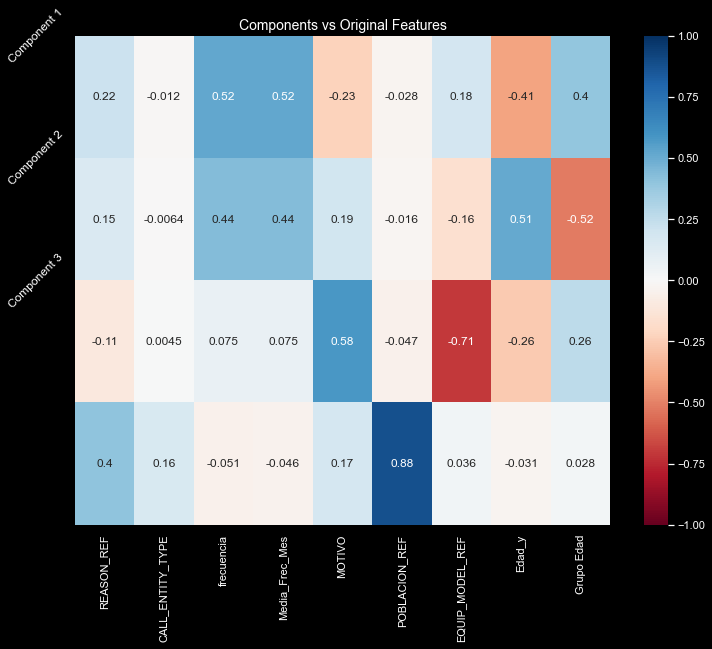

In [93]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_usuarios_sin_duplicados['TIPOLOGIA_USUARIO'] = encoder.fit_transform(df_usuarios_sin_duplicados['TIPOLOGIA_USUARIO'])
df_usuarios_sin_duplicados['Grupo Edad'] = encoder.fit_transform(df_usuarios_sin_duplicados['Grupo Edad'])


In [95]:
df_usuarios_sin_duplicados = df_usuarios_sin_duplicados.drop(columns=['RESIDENT_DEF', 'USUARIO_REF', 'USUARIOS_SITUACION_TEXT', 'USUARIOS_MOTIVO_TEXT', 'POBLACION_TEXT', 'PROVINCIA_REF', 'PROVINCIA_TEXT', 'TEXT', 'ADDRESS_TOWN', 'ADDRESS_COUNTY'])

In [96]:
df_usuarios_sin_duplicados = df_usuarios_sin_duplicados.drop('MOTIVO', axis=1)
df_usuarios_sin_duplicados = df_usuarios_sin_duplicados.select_dtypes(include=['number'])
df_usuarios_sin_duplicados

,TIPOLOGIA_USUARIO,SITUACION,POBLACION_REF,EQUIP_MODEL_REF,Edad,Grupo Edad
0,8,3,2114,120,103.0,4
1,8,3,2114,104,102.0,4
2,8,3,2114,104,94.0,4
3,8,3,2115,259,107.0,4
4,8,3,2115,23,97.0,4
...,...,...,...,...,...,...
46457,8,4,2132,120,89.0,3
46458,8,4,2191,120,83.0,3
46459,8,4,2205,388,84.0,3
46460,8,4,2191,399,83.0,3


In [97]:
df_usuarios_sin_duplicados.isna().sum()

TIPOLOGIA_USUARIO     0
SITUACION             0
POBLACION_REF         0
EQUIP_MODEL_REF       0
Edad                 42
Grupo Edad            0
dtype: int64

In [98]:
df_usuarios_sin_duplicados = df_usuarios_sin_duplicados.dropna()

In [99]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_usuarios_sin_duplicados)
df_std = pd.DataFrame(data = df_std,columns = df_usuarios_sin_duplicados.columns)

In [100]:
pca = PCA()
pca.fit(df_std) 

PCA()

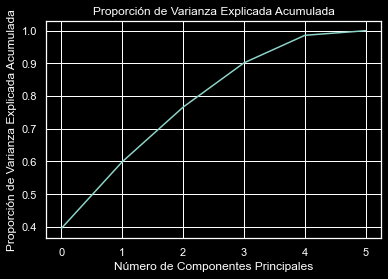

In [101]:
# Calcula la proporción de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Gráfico de la proporción de varianza explicada acumulada
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(cumulative_variance_ratio)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.title('Proporción de Varianza Explicada Acumulada')
plt.show()

In [102]:
pca = PCA(n_components = 2)
pca.fit(df_std)
pca.components_

array([[-0.22059317, -0.37259692,  0.02651142,  0.37466497, -0.58248349,
        -0.57632151],
       [-0.51536041,  0.53964686, -0.06983792, -0.55407998, -0.26370887,
        -0.24851678]])

In [103]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_usuarios_sin_duplicados.columns,
              index = ['Component 1', 'Component 2'])
df_pca_comp

,TIPOLOGIA_USUARIO,SITUACION,POBLACION_REF,EQUIP_MODEL_REF,Edad,Grupo Edad
Component 1,-0.220593,-0.372597,0.026511,0.374665,-0.582483,-0.576322
Component 2,-0.515360,0.539647,-0.069838,-0.554080,-0.263709,-0.248517


### K-MEANS

- Incidentes

In [104]:
scaler = StandardScaler()
df_std = scaler.fit_transform(columnas_numericas)
df_std = pd.DataFrame(data = df_std,columns = columnas_numericas.columns)

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'Inertia')

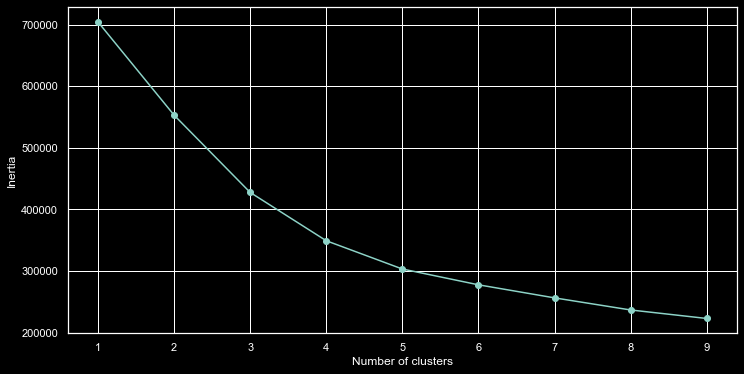

In [105]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_std)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [106]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(df_std)

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [107]:
df_segm_kmeans= df_std.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [108]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_std, kmeans.labels_, metric='euclidean'))

0.31652418144679456


In [109]:
print(df_segm_kmeans.head())

   INCIDENT_DEF  INCI_TYPE_REF      Edad  Grupo Edad  frecuencia  \
0      0.881237       0.872531  1.653889   -1.180209    0.598296   
1      0.881237       0.872531  1.653889   -1.180209    0.598296   
2     -1.286296      -1.162502  1.653889   -1.180209    0.598296   
3      0.881237       0.872531  1.653889   -1.180209    0.598296   
4      0.881237       0.872531  1.653889   -1.180209    0.598296   

   Media_Frec_Año  Media_Frec_Mes  Media_Frec_Dia  Segment K-means  
0       -0.137921        0.893235        2.479832                2  
1       -0.137921        0.893235        2.479832                2  
2       -0.137921        0.893235        2.479832                0  
3       -0.137921        0.893235        2.479832                2  
4       -0.137921        0.893235        2.479832                2  


In [110]:
pred = kmeans.predict(df_std)
frame = pd.DataFrame(columnas_numericas)
frame['cluster'] = pred

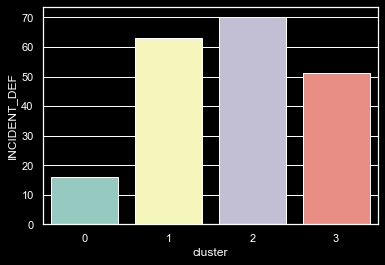

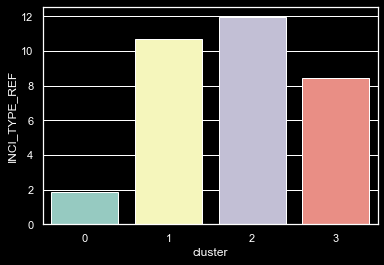

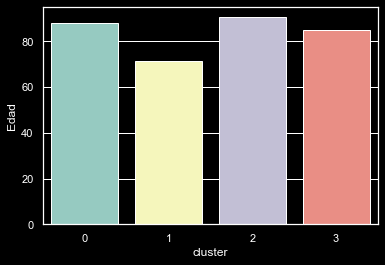

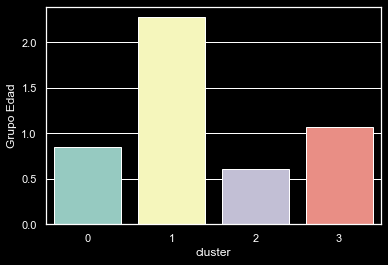

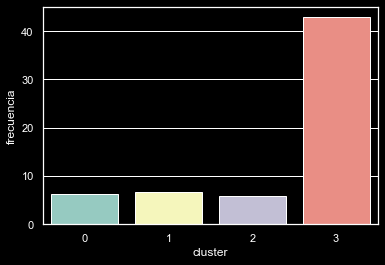

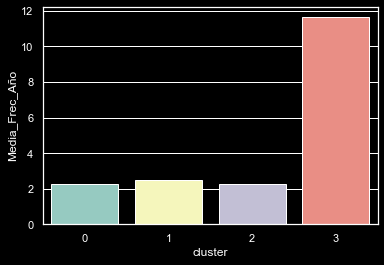

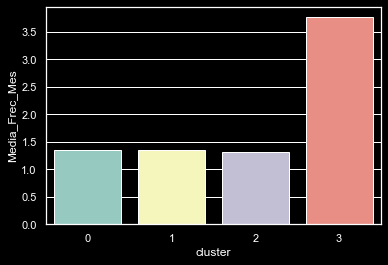

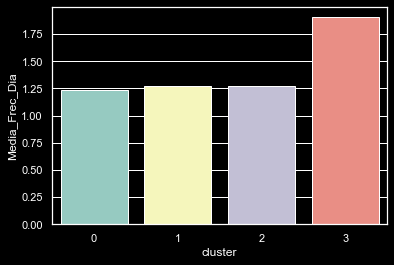

In [111]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in df_std.columns:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

- Llamadas

In [112]:
scaler = StandardScaler()
df_std = scaler.fit_transform(llamadas)
df_std = pd.DataFrame(data = df_std,columns = llamadas.columns)

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'Inertia')

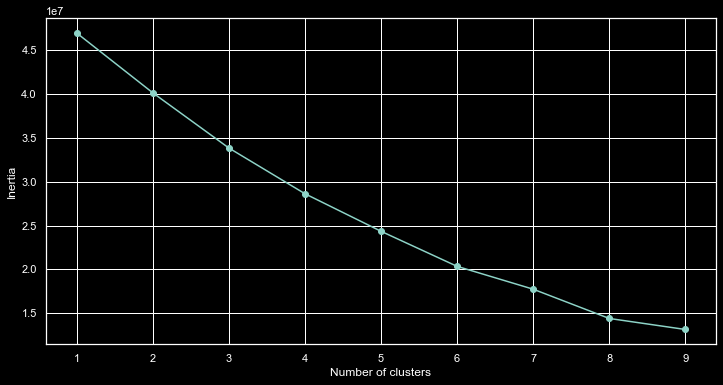

In [113]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_std)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [114]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(df_std)

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [115]:
# print(silhouette_score(df_std, kmeans.labels_, metric='euclidean'))

In [116]:
pred = kmeans.predict(df_std)
frame = pd.DataFrame(llamadas)
frame['cluster'] = pred

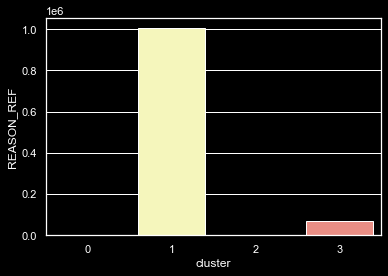

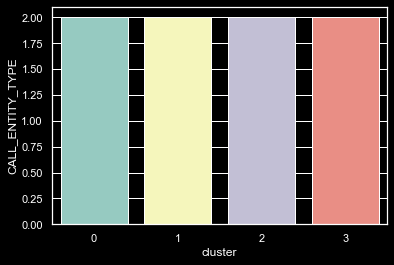

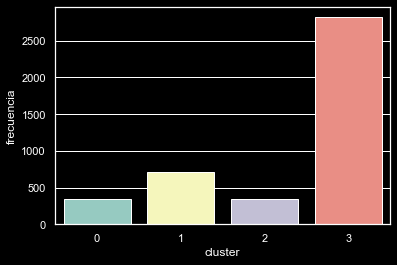

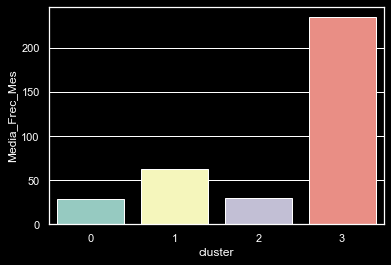

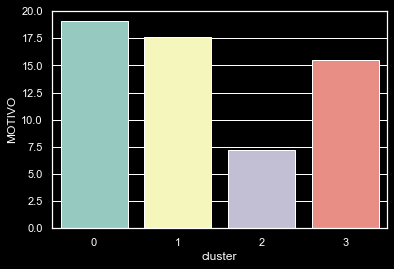

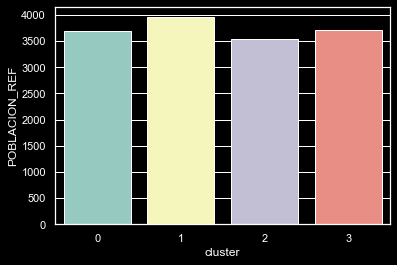

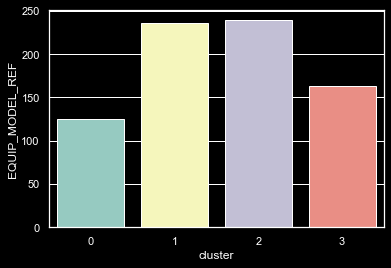

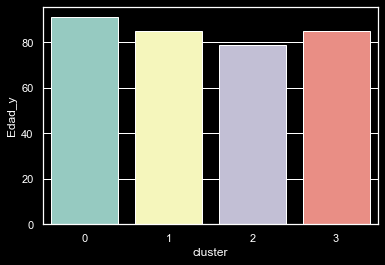

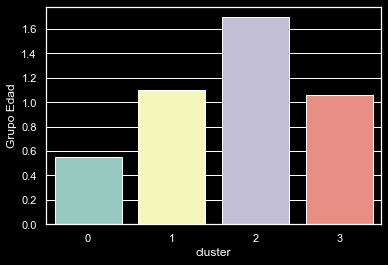

In [117]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in df_std.columns:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

- Usuarios

In [118]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_usuarios_sin_duplicados)
df_std = pd.DataFrame(data = df_std,columns = df_usuarios_sin_duplicados.columns)

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'Inertia')

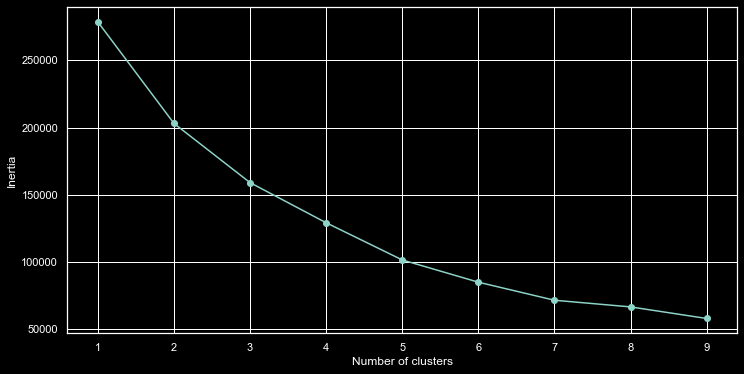

In [119]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_std)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [120]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(df_std)

c:\Users\Laura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [121]:
print(silhouette_score(df_std, kmeans.labels_, metric='euclidean'))

0.37160630319959603


In [122]:
pred = kmeans.predict(df_std)
frame = pd.DataFrame(df_usuarios_sin_duplicados)
frame['cluster'] = pred

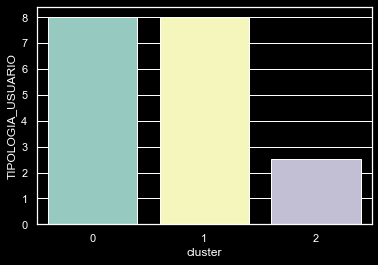

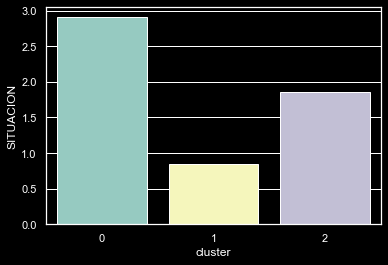

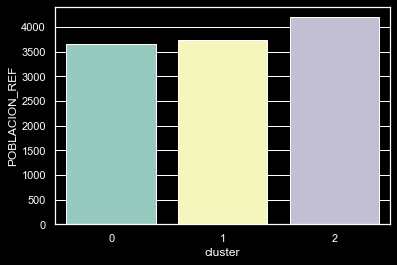

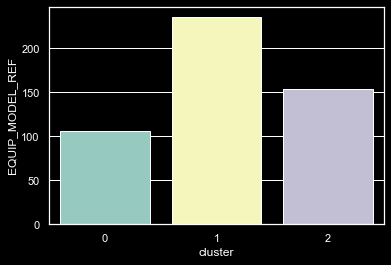

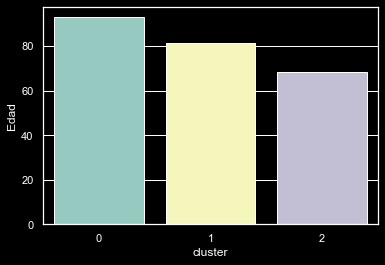

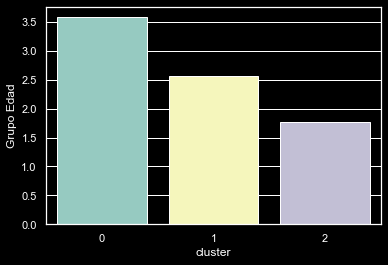

In [123]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in df_std.columns:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()